In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit


**Combining All CSV from Jack Sackmann Github: https://github.com/JeffSackmann/tennis_atp**

In [2]:
# urls = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{}.csv"

# years = range(1991,2024)

# df_pandas = pd.DataFrame()
# for i in years:
#     url = urls.format(i)
#     df = pd.read_csv(url)
#     df_pandas = pd.concat([df_pandas,df ])

# df_pandas.to_csv('all_years_csv.csv', index=False)


**Creating one CSV with cut off date as Jun'23**

In [3]:
df_pandas_local = pd.read_csv('all_years_csv.csv',low_memory=False)

**Inpsecting Dataset** 

In [4]:
df_pandas_local

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103999,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,Hard,4,D,20230204,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
104000,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,Hard,4,D,20230203,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
104001,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,Hard,4,D,20230203,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
104002,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,Hard,4,D,20230203,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


In [5]:
df_pandas_local.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,104004.000000,1.040040e+05,104004.000000,104004.000000,101599.000000,103999.000000,104004.000000,99225.000000,103983.000000,104004.000000,...,93801.000000,93801.000000,93801.000000,93802.000000,93801.000000,93801.000000,102817.000000,101829.000000,101472.000000,100489.000000
mean,53.361332,2.005701e+07,71.404696,106447.326997,185.706021,25.764474,106563.721895,185.201512,25.878070,3.439387,...,48.044093,31.918775,14.974489,12.198706,4.810077,8.736719,80.733060,1426.469974,119.178108,894.372648
std,38.589626,9.371884e+04,112.543175,15157.429801,6.661096,3.801114,15368.291793,6.609441,3.927102,0.828082,...,19.379791,14.441970,7.212171,4.128747,3.274951,4.132850,134.703406,1750.689119,179.936752,1000.991736
min,2.000000,1.990123e+07,1.000000,100284.000000,160.000000,14.300000,100282.000000,160.000000,14.500000,3.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,1.997092e+07,10.000000,102148.000000,180.000000,22.900000,102148.000000,180.000000,23.000000,3.000000,...,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000,18.000000,528.000000,37.000000,394.000000
50%,32.000000,2.005072e+07,24.000000,103598.000000,185.000000,25.500000,103543.000000,185.000000,25.700000,3.000000,...,45.000000,29.000000,14.000000,11.000000,4.000000,8.000000,46.000000,879.000000,70.000000,657.000000
75%,64.000000,2.014011e+07,70.000000,104792.000000,190.000000,28.300000,104898.000000,190.000000,28.500000,3.000000,...,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000,89.000000,1595.000000,119.000000,1040.000000
max,128.000000,2.023063e+07,1701.000000,211468.000000,211.000000,42.700000,212041.000000,211.000000,46.000000,5.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


In [6]:
df_pandas_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104004 entries, 0 to 104003
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          104004 non-null  object 
 1   tourney_name        104004 non-null  object 
 2   surface             104004 non-null  object 
 3   draw_size           104004 non-null  int64  
 4   tourney_level       104004 non-null  object 
 5   tourney_date        104004 non-null  int64  
 6   match_num           104004 non-null  int64  
 7   winner_id           104004 non-null  int64  
 8   winner_seed         42111 non-null   object 
 9   winner_entry        12680 non-null   object 
 10  winner_name         104004 non-null  object 
 11  winner_hand         103995 non-null  object 
 12  winner_ht           101599 non-null  float64
 13  winner_ioc          104004 non-null  object 
 14  winner_age          103999 non-null  float64
 15  loser_id            104004 non-nul

In [7]:
df_pandas_local.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           61893
winner_entry          91324
winner_name               0
winner_hand               9
winner_ht              2405
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            80852
loser_entry           83117
loser_name                0
loser_hand               42
loser_ht               4779
loser_ioc                 0
loser_age                21
score                     0
best_of                   0
round                     0
minutes               13036
w_ace                 10203
w_df                  10203
w_svpt                10203
w_1stIn               10203
w_1stWon              10203
w_2ndWon              10203
w_SvGms               10202
w_bpSaved             10203
w_bpFaced           

In [8]:
df_selected_columns = df_pandas_local.drop(columns=['winner_seed', 'winner_entry', 'winner_hand','winner_ht','loser_seed','loser_entry','loser_hand','loser_ht','winner_rank_points','loser_rank_points','minutes'])

df_selected_columns.isnull().sum()

tourney_id           0
tourney_name         0
surface              0
draw_size            0
tourney_level        0
tourney_date         0
match_num            0
winner_id            0
winner_name          0
winner_ioc           0
winner_age           5
loser_id             0
loser_name           0
loser_ioc            0
loser_age           21
score                0
best_of              0
round                0
w_ace            10203
w_df             10203
w_svpt           10203
w_1stIn          10203
w_1stWon         10203
w_2ndWon         10203
w_SvGms          10202
w_bpSaved        10203
w_bpFaced        10203
l_ace            10203
l_df             10203
l_svpt           10203
l_1stIn          10203
l_1stWon         10203
l_2ndWon         10203
l_SvGms          10202
l_bpSaved        10203
l_bpFaced        10203
winner_rank       1187
loser_rank        2532
dtype: int64

**Removing "Davis Cup" games from the Dataset**

In [9]:
df_selected_columns_without_Davis = df_selected_columns[df_selected_columns['tourney_level'] != 'D']

In [10]:
df_selected_columns_without_Davis.isnull().sum()

tourney_id          0
tourney_name        0
surface             0
draw_size           0
tourney_level       0
tourney_date        0
match_num           0
winner_id           0
winner_name         0
winner_ioc          0
winner_age          0
loser_id            0
loser_name          0
loser_ioc           0
loser_age          17
score               0
best_of             0
round               0
w_ace            1798
w_df             1798
w_svpt           1798
w_1stIn          1798
w_1stWon         1798
w_2ndWon         1798
w_SvGms          1797
w_bpSaved        1798
w_bpFaced        1798
l_ace            1798
l_df             1798
l_svpt           1798
l_1stIn          1798
l_1stWon         1798
l_2ndWon         1798
l_SvGms          1797
l_bpSaved        1798
l_bpFaced        1798
winner_rank       234
loser_rank        496
dtype: int64

**Cleaning all rows with null values**

In [11]:
# Get list of columns with null values

cols_with_nulls = df_selected_columns_without_Davis.columns[df_selected_columns_without_Davis.isnull().any()].tolist()

# Drop rows with null values in the selected columns

df_selected_columns_without_Davis_cleaned = df_selected_columns_without_Davis.dropna(subset=cols_with_nulls)

df_selected_columns_without_Davis_cleaned

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,56.0,2.0
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,304.0,75.0
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,82.0,69.0
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,50.0,84.0
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,88.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103903,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,3.0,116.0,72.0,57.0,23.0,18.0,0.0,1.0,91.0,51.0
103904,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,4.0,127.0,88.0,61.0,24.0,17.0,8.0,9.0,57.0,45.0
103905,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,1.0,68.0,52.0,31.0,8.0,9.0,5.0,8.0,46.0,32.0
103906,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,11.0,119.0,65.0,42.0,23.0,16.0,5.0,11.0,79.0,367.0


In [12]:
df_selected_columns_without_Davis_cleaned.isnull().sum()

tourney_id       0
tourney_name     0
surface          0
draw_size        0
tourney_level    0
tourney_date     0
match_num        0
winner_id        0
winner_name      0
winner_ioc       0
winner_age       0
loser_id         0
loser_name       0
loser_ioc        0
loser_age        0
score            0
best_of          0
round            0
w_ace            0
w_df             0
w_svpt           0
w_1stIn          0
w_1stWon         0
w_2ndWon         0
w_SvGms          0
w_bpSaved        0
w_bpFaced        0
l_ace            0
l_df             0
l_svpt           0
l_1stIn          0
l_1stWon         0
l_2ndWon         0
l_SvGms          0
l_bpSaved        0
l_bpFaced        0
winner_rank      0
loser_rank       0
dtype: int64

**Checking for duplicates**

In [13]:
duplicates = df_selected_columns_without_Davis_cleaned.duplicated()
print(duplicates.any())

False


**Checking and cleaning negative figures of breakpoints**

In [14]:
df_selected_columns_without_Davis_cleaned = df_selected_columns_without_Davis_cleaned[df_selected_columns_without_Davis_cleaned['l_bpSaved'] >= 0]

df_selected_columns_without_Davis_cleaned

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,56.0,2.0
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,304.0,75.0
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,82.0,69.0
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,50.0,84.0
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,88.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103903,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,3.0,116.0,72.0,57.0,23.0,18.0,0.0,1.0,91.0,51.0
103904,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,4.0,127.0,88.0,61.0,24.0,17.0,8.0,9.0,57.0,45.0
103905,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,1.0,68.0,52.0,31.0,8.0,9.0,5.0,8.0,46.0,32.0
103906,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,11.0,119.0,65.0,42.0,23.0,16.0,5.0,11.0,79.0,367.0


In [15]:
removed_rows = df_selected_columns_without_Davis_cleaned[df_selected_columns_without_Davis_cleaned['l_bpSaved'] < 0]

print(removed_rows)

Empty DataFrame
Columns: [tourney_id, tourney_name, surface, draw_size, tourney_level, tourney_date, match_num, winner_id, winner_name, winner_ioc, winner_age, loser_id, loser_name, loser_ioc, loser_age, score, best_of, round, w_ace, w_df, w_svpt, w_1stIn, w_1stWon, w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, l_ace, l_df, l_svpt, l_1stIn, l_1stWon, l_2ndWon, l_SvGms, l_bpSaved, l_bpFaced, winner_rank, loser_rank]
Index: []

[0 rows x 38 columns]


**Inspecting reliability of the breakpoints data**

In [16]:
# Check where 'w_bpSaved' is greater than 'w_bpFaced'

invalid_w_bp = df_selected_columns_without_Davis_cleaned[df_selected_columns_without_Davis_cleaned['w_bpSaved'] > df_selected_columns_without_Davis_cleaned['w_bpFaced']]

# Check where 'l_bpSaved' is greater than 'l_bpFaced'

invalid_l_bp = df_selected_columns_without_Davis_cleaned[df_selected_columns_without_Davis_cleaned['l_bpSaved'] > df_selected_columns_without_Davis_cleaned['l_bpFaced']]


print("Invalid winner break points:")
print(invalid_w_bp)

print("\nInvalid loser break points:")
print(invalid_l_bp)

Invalid winner break points:
Empty DataFrame
Columns: [tourney_id, tourney_name, surface, draw_size, tourney_level, tourney_date, match_num, winner_id, winner_name, winner_ioc, winner_age, loser_id, loser_name, loser_ioc, loser_age, score, best_of, round, w_ace, w_df, w_svpt, w_1stIn, w_1stWon, w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, l_ace, l_df, l_svpt, l_1stIn, l_1stWon, l_2ndWon, l_SvGms, l_bpSaved, l_bpFaced, winner_rank, loser_rank]
Index: []

[0 rows x 38 columns]

Invalid loser break points:
Empty DataFrame
Columns: [tourney_id, tourney_name, surface, draw_size, tourney_level, tourney_date, match_num, winner_id, winner_name, winner_ioc, winner_age, loser_id, loser_name, loser_ioc, loser_age, score, best_of, round, w_ace, w_df, w_svpt, w_1stIn, w_1stWon, w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, l_ace, l_df, l_svpt, l_1stIn, l_1stWon, l_2ndWon, l_SvGms, l_bpSaved, l_bpFaced, winner_rank, loser_rank]
Index: []

[0 rows x 38 columns]


**Dealing with the score column and creating a list with each set score separately, adding a new column "score_sets"**

**Example: "6-7(8) 6-3 6-4 6-2" will be divided to a list with 4 elements**

In [17]:
# Create a list to hold the score sets

score_sets = []

# Iterate through the 'score' column and split each score string by space

for score in df_selected_columns_without_Davis_cleaned['score']:
    sets = score.split(' ')
    score_sets.append(sets)
    
df_selected_columns_without_Davis_cleaned = df_selected_columns_without_Davis_cleaned.copy()
df_selected_columns_without_Davis_cleaned['score_sets'] = score_sets


In [18]:
df_selected_columns_without_Davis_cleaned

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,score_sets
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,95.0,62.0,44.0,23.0,16.0,6.0,8.0,56.0,2.0,"[6-4, 3-6, 7-6(2)]"
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,84.0,41.0,35.0,27.0,15.0,1.0,2.0,304.0,75.0,"[6-3, 3-6, 7-6(6)]"
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,60.0,37.0,22.0,6.0,8.0,4.0,8.0,82.0,69.0,"[6-0, 6-4]"
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,74.0,45.0,30.0,11.0,10.0,5.0,8.0,50.0,84.0,"[7-6(2), 6-1]"
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,77.0,41.0,28.0,15.0,11.0,4.0,8.0,88.0,28.0,"[7-5, 6-3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103903,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,116.0,72.0,57.0,23.0,18.0,0.0,1.0,91.0,51.0,"[6-7(5), 7-6(3), 7-6(5)]"
103904,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,127.0,88.0,61.0,24.0,17.0,8.0,9.0,57.0,45.0,"[3-6, 7-6(6), 7-6(4)]"
103905,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,68.0,52.0,31.0,8.0,9.0,5.0,8.0,46.0,32.0,"[6-2, 6-4]"
103906,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,119.0,65.0,42.0,23.0,16.0,5.0,11.0,79.0,367.0,"[2-6, 7-6(5), 7-6(4)]"


**Checking score_sets boundaries for each set**

In [19]:
left_numbers = []
right_numbers = []

# Iterate through the 'score_sets' column

for sets in df_selected_columns_without_Davis_cleaned['score_sets']:
    first_set = sets[0] 
    if "-" in first_set: 
        left, right = first_set.split('-')  
      
        left_numbers.append(float(left.split('(')[0]))
        right_numbers.append(float(right.split('(')[0]))

# Determine the range for the left and right numbers

left_range = (min(left_numbers), max(left_numbers))
right_range = (min(right_numbers), max(right_numbers))

print("Range for left numbers:", left_range)
print("Range for right numbers:", right_range)


Range for left numbers: (0.0, 7.0)
Range for right numbers: (0.0, 7.0)


In [20]:
left_numbers_2nd_set = []
right_numbers_2nd_set = []


for sets in df_selected_columns_without_Davis_cleaned['score_sets']:
   
    if len(sets) > 1:
        second_set = sets[1]  
        if "-" in second_set:
            left, right = second_set.split('-') 
           
            left_numbers_2nd_set.append(float(left.split('(')[0]))
            right_numbers_2nd_set.append(float(right.split('(')[0]))

# Determine the range for the left and right numbers of the second set

left_range_2nd_set = (min(left_numbers_2nd_set), max(left_numbers_2nd_set))
right_range_2nd_set = (min(right_numbers_2nd_set), max(right_numbers_2nd_set))

print("Range for left numbers in the second set:", left_range_2nd_set)
print("Range for right numbers in the second set:", right_range_2nd_set)

Range for left numbers in the second set: (0.0, 7.0)
Range for right numbers in the second set: (0.0, 7.0)


In [21]:
left_numbers_3rd_set = []
right_numbers_3rd_set = []


for sets in df_selected_columns_without_Davis_cleaned['score_sets']:

    if len(sets) > 2:
        third_set = sets[2]  
        if "-" in third_set:
            left, right = third_set.split('-')
           
            left_numbers_3rd_set.append(float(left.split('(')[0]))
            right_numbers_3rd_set.append(float(right.split('(')[0]))

# Determine the range for the left and right numbers of the third set

left_range_3rd_set = (min(left_numbers_3rd_set), max(left_numbers_3rd_set))
right_range_3rd_set = (min(right_numbers_3rd_set), max(right_numbers_3rd_set))

print("Range for left numbers in the third set:", left_range_3rd_set)
print("Range for right numbers in the third set:", right_range_3rd_set)

Range for left numbers in the third set: (0.0, 25.0)
Range for right numbers in the third set: (0.0, 23.0)


In [22]:
left_numbers_4th_set = []
right_numbers_4th_set = []


for sets in df_selected_columns_without_Davis_cleaned['score_sets']:
   
    if len(sets) > 3:
        fourth_set = sets[3]  
        if "-" in fourth_set: 
            left, right = fourth_set.split('-')  
      
            left_numbers_4th_set.append(float(left.split('(')[0]))
            right_numbers_4th_set.append(float(right.split('(')[0]))

# Determine the range for the left and right numbers of the fourth set

left_range_4th_set = (min(left_numbers_4th_set), max(left_numbers_4th_set))
right_range_4th_set = (min(right_numbers_4th_set), max(right_numbers_4th_set))

print("Range for left numbers in the fourth set:", left_range_4th_set)
print("Range for right numbers in the fourth set:", right_range_4th_set)

Range for left numbers in the fourth set: (0.0, 7.0)
Range for right numbers in the fourth set: (0.0, 7.0)


In [23]:
left_numbers_5th_set = []
right_numbers_5th_set = []


for sets in df_selected_columns_without_Davis_cleaned['score_sets']:
    if len(sets) > 4:
        fifth_set = sets[4]  
        if "-" in fifth_set: 
            left, right = fifth_set.split('-') 
            
            left_numbers_5th_set.append(float(left.split('(')[0]))
            right_numbers_5th_set.append(float(right.split('(')[0]))

# Determine the range for the left and right numbers of the fifth set

left_range_5th_set = (min(left_numbers_5th_set), max(left_numbers_5th_set))
right_range_5th_set = (min(right_numbers_5th_set), max(right_numbers_5th_set))

print("Range for left numbers in the fifth set:", left_range_5th_set)
print("Range for right numbers in the fifth set:", right_range_5th_set)

Range for left numbers in the fifth set: (0.0, 70.0)
Range for right numbers in the fifth set: (0.0, 68.0)


**Checking for Tiebreaks occurences and adding a new column of "total_tiebreaks" per match**

In [24]:
# Initialize a list to store the count of tiebreaks for each row

tiebreak_counts = []

# Iterate through the score_sets column

for score_sets in df_selected_columns_without_Davis_cleaned['score_sets']:
   
    tiebreak_count = 0
  
    for score_set in score_sets:
      
        if '-' in score_set:
           
            left, right = score_set.split('-')
            if "(" in left:
                left = left.split("(")[0]
            if "(" in right:
                right = right.split("(")[0]
            if abs(int(left) - int(right)) == 1:
                tiebreak_count += 1
                
    # Append the count for the current row to the tiebreak_counts list
    tiebreak_counts.append(tiebreak_count)

# Create a new column in the DataFrame with the tiebreak counts

df_selected_columns_without_Davis_cleaned['total_tiebreaks'] = tiebreak_counts

#df_selected_columns_without_Davis_cleaned.to_excel('updated_data.xlsx', index=False)

**Assigning tiebreaks win counts and adding 2 more columns for each player per match**

In [25]:
# Initialize lists to store the count of tiebreaks won by the winner and loser for each row

winner_tiebreak_counts = []
loser_tiebreak_counts = []

for score_sets in df_selected_columns_without_Davis_cleaned['score_sets']:
    
    winner_tiebreak_count = 0
    loser_tiebreak_count = 0
    
    for score_set in score_sets:
        
        if '-' in score_set:
            
            left, right = score_set.split('-')
            if "(" in left:
                left = left.split("(")[0]
            if "(" in right:
                right = right.split("(")[0]
                
            # Check if the difference is 1, indicating a tiebreak
            
            if abs(int(left) - int(right)) == 1:
                
                # Increment the winner's count if the left side is greater, and the loser's count otherwise
                
                if int(left) > int(right):
                    winner_tiebreak_count += 1
                else:
                    loser_tiebreak_count += 1
                    
    # Append the counts for the current row to the lists
    
    winner_tiebreak_counts.append(winner_tiebreak_count)
    loser_tiebreak_counts.append(loser_tiebreak_count)

# Create new columns in the DataFrame with the tiebreak counts for the winner and loser

df_selected_columns_without_Davis_cleaned['w_tiebreaks'] = winner_tiebreak_counts
df_selected_columns_without_Davis_cleaned['l_tiebreaks'] = loser_tiebreak_counts


#df_selected_columns_without_Davis_cleaned.to_excel('updated_data_with_tiebreaks.xlsx', index=False)

**Checking for strings in the score_sets column as some matches end due to injuries, players retiring, and other reasons**

In [26]:
# Iterate through the score_sets column

for index, score_sets in enumerate(df_selected_columns_without_Davis_cleaned['score_sets']):
    
    for score_set in score_sets:
        
      
        if '-' not in score_set:
            
            print(f"Row {index}: Found special entry in score_sets: {score_set}")

Row 10: Found special entry in score_sets: RET
Row 89: Found special entry in score_sets: RET
Row 150: Found special entry in score_sets: RET
Row 295: Found special entry in score_sets: RET
Row 366: Found special entry in score_sets: RET
Row 455: Found special entry in score_sets: RET
Row 533: Found special entry in score_sets: RET
Row 657: Found special entry in score_sets: RET
Row 683: Found special entry in score_sets: RET
Row 689: Found special entry in score_sets: RET
Row 751: Found special entry in score_sets: RET
Row 785: Found special entry in score_sets: RET
Row 793: Found special entry in score_sets: 
Row 793: Found special entry in score_sets: W/O
Row 854: Found special entry in score_sets: RET
Row 1007: Found special entry in score_sets: RET
Row 1049: Found special entry in score_sets: RET
Row 1100: Found special entry in score_sets: RET
Row 1103: Found special entry in score_sets: RET
Row 1140: Found special entry in score_sets: RET
Row 1154: Found special entry in score_s

**Checking for "comeback" occurences and adding a new column of "comeback"**

In [27]:
def is_comeback(sets):
    
    binary_sequence = []
    
    for set_score in sets:
        if '-' not in set_score: 
            continue
            
        left, right = set_score.split('-')
        left = left.split('(')[0]  
        right = right.split('(')[0]
        binary_sequence.append(int(int(left) > int(right)))
    
    comeback_patterns = [
        
        [0, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 1, 0, 1], 
    ]
    
    return int(any(binary_sequence[:len(pattern)] == pattern for pattern in comeback_patterns))

start_time = time.time()

df_selected_columns_without_Davis_cleaned['comeback'] = df_selected_columns_without_Davis_cleaned['score_sets'].apply(is_comeback)


df_selected_columns_without_Davis_cleaned.reset_index(drop=True, inplace=True)

# Export the DataFrame to Excel
#df_selected_columns_without_Davis_cleaned.to_excel("comebacks_revised4.xlsx", index=False)

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to process: {time_taken:.2f} seconds")

Time taken to process: 0.29 seconds


In [28]:
df_selected_columns_without_Davis_cleaned

# 43 columns at present

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,score_sets,total_tiebreaks,w_tiebreaks,l_tiebreaks,comeback
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,16.0,6.0,8.0,56.0,2.0,"[6-4, 3-6, 7-6(2)]",1,1,0,0
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,15.0,1.0,2.0,304.0,75.0,"[6-3, 3-6, 7-6(6)]",1,1,0,0
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,8.0,4.0,8.0,82.0,69.0,"[6-0, 6-4]",0,0,0,0
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,10.0,5.0,8.0,50.0,84.0,"[7-6(2), 6-1]",1,1,0,0
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,11.0,4.0,8.0,88.0,28.0,"[7-5, 6-3]",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92012,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,18.0,0.0,1.0,91.0,51.0,"[6-7(5), 7-6(3), 7-6(5)]",3,2,1,1
92013,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,17.0,8.0,9.0,57.0,45.0,"[3-6, 7-6(6), 7-6(4)]",2,2,0,1
92014,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,9.0,5.0,8.0,46.0,32.0,"[6-2, 6-4]",0,0,0,0
92015,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,16.0,5.0,11.0,79.0,367.0,"[2-6, 7-6(5), 7-6(4)]",2,2,0,1


**Checking unexpected score of the last set**

In [29]:
for index, row in df_selected_columns_without_Davis_cleaned.iterrows():
    
    sets = row['score_sets']
    last_set = sets[-1]
    
    if '-' not in last_set:
        continue

    left, right = last_set.split('-')
    left = left.split('(')[0]
    right = right.split('(')[0]

    if int(right) >= int(left):
        print(f"Found in row number: {index}")
        print(f"Score sets: {sets}")


Found in row number: 255
Score sets: ['6-0', '2-2']
Found in row number: 2703
Score sets: ['7-6(5)', '0-1']
Found in row number: 25681
Score sets: ['3-6', '6-3', '1-1']
Found in row number: 49990
Score sets: ['6-2', '5-7', '1-1']
Found in row number: 50595
Score sets: ['6-3', '1-1']
Found in row number: 51207
Score sets: ['7-6(4)', '2-2']


In [30]:
for index, score_sets in enumerate(df_selected_columns_without_Davis_cleaned['score_sets']):
    if not isinstance(score_sets, list):
        print(f"Row {index}: score_sets is not a list, it's a {type(score_sets)}")
        continue
    for score_set in score_sets:
        if not isinstance(score_set, str):
            print(f"Row {index}: Found non-string element in score_sets: {score_set}, type: {type(score_set)}")

**Inspecting unique players count**

In [31]:
unique_winner_ids = df_selected_columns_without_Davis_cleaned['winner_id'].nunique()
unique_winner_names = df_selected_columns_without_Davis_cleaned['winner_name'].nunique()
unique_loser_ids = df_selected_columns_without_Davis_cleaned['loser_id'].nunique()
unique_loser_names = df_selected_columns_without_Davis_cleaned['loser_name'].nunique()

print(f"Unique Winner IDs: {unique_winner_ids}")
print(f"Unique Winner Names: {unique_winner_names}")
print(f"Unique Loser IDs: {unique_loser_ids}")
print(f"Unique Loser Names: {unique_loser_names}")

Unique Winner IDs: 1426
Unique Winner Names: 1427
Unique Loser IDs: 2097
Unique Loser Names: 2098


In [32]:
# Finding discrepancies for winners

winner_pairs = df_selected_columns_without_Davis_cleaned[['winner_id', 'winner_name']].drop_duplicates()
winner_id_counts = winner_pairs['winner_id'].value_counts()
winner_name_counts = winner_pairs['winner_name'].value_counts()

discrepancy_winner_ids = winner_id_counts[winner_id_counts > 1].index
discrepancy_winner_names = winner_name_counts[winner_name_counts > 1].index

discrepancy_winner_rows = winner_pairs[(winner_pairs['winner_id'].isin(discrepancy_winner_ids)) | 
                                      (winner_pairs['winner_name'].isin(discrepancy_winner_names))]

# Finding discrepancies for losers

loser_pairs = df_selected_columns_without_Davis_cleaned[['loser_id', 'loser_name']].drop_duplicates()
loser_id_counts = loser_pairs['loser_id'].value_counts()
loser_name_counts = loser_pairs['loser_name'].value_counts()

discrepancy_loser_ids = loser_id_counts[loser_id_counts > 1].index
discrepancy_loser_names = loser_name_counts[loser_name_counts > 1].index

discrepancy_loser_rows = loser_pairs[(loser_pairs['loser_id'].isin(discrepancy_loser_ids)) | 
                                     (loser_pairs['loser_name'].isin(discrepancy_loser_names))]

print("Discrepancy Winner Rows:")
print(discrepancy_winner_rows)
print("\nDiscrepancy Loser Rows:")
print(discrepancy_loser_rows)

Discrepancy Winner Rows:
       winner_id             winner_name
43457     104273  Edouard Roger Vasselin
52457     104273  Edouard Roger-Vasselin

Discrepancy Loser Rows:
       loser_id              loser_name
41049    104273  Edouard Roger Vasselin
52323    104273  Edouard Roger-Vasselin


In [33]:
# Replace the name in winner and loser columns

df_selected_columns_without_Davis_cleaned['winner_name'] = df_selected_columns_without_Davis_cleaned['winner_name'].replace('Edouard Roger-Vasselin', 'Edouard Roger Vasselin')
df_selected_columns_without_Davis_cleaned['loser_name'] = df_selected_columns_without_Davis_cleaned['loser_name'].replace('Edouard Roger-Vasselin', 'Edouard Roger Vasselin')


# Finding discrepancies for winners

winner_pairs = df_selected_columns_without_Davis_cleaned[['winner_id', 'winner_name']].drop_duplicates()
winner_id_counts = winner_pairs['winner_id'].value_counts()
winner_name_counts = winner_pairs['winner_name'].value_counts()

discrepancy_winner_ids = winner_id_counts[winner_id_counts > 1].index
discrepancy_winner_names = winner_name_counts[winner_name_counts > 1].index

discrepancy_winner_rows = winner_pairs[(winner_pairs['winner_id'].isin(discrepancy_winner_ids)) | 
                                      (winner_pairs['winner_name'].isin(discrepancy_winner_names))]

# Finding discrepancies for losers

loser_pairs = df_selected_columns_without_Davis_cleaned[['loser_id', 'loser_name']].drop_duplicates()
loser_id_counts = loser_pairs['loser_id'].value_counts()
loser_name_counts = loser_pairs['loser_name'].value_counts()

discrepancy_loser_ids = loser_id_counts[loser_id_counts > 1].index
discrepancy_loser_names = loser_name_counts[loser_name_counts > 1].index

discrepancy_loser_rows = loser_pairs[(loser_pairs['loser_id'].isin(discrepancy_loser_ids)) | 
                                     (loser_pairs['loser_name'].isin(discrepancy_loser_names))]

print("Discrepancy Winner Rows:")
print(discrepancy_winner_rows)
print("\nDiscrepancy Loser Rows:")
print(discrepancy_loser_rows)

# Print the new unique counts

print("Unique Winner IDs:", len(df_selected_columns_without_Davis_cleaned['winner_id'].unique()))
print("Unique Winner Names:", len(df_selected_columns_without_Davis_cleaned['winner_name'].unique()))
print("Unique Loser IDs:", len(df_selected_columns_without_Davis_cleaned['loser_id'].unique()))
print("Unique Loser Names:", len(df_selected_columns_without_Davis_cleaned['loser_name'].unique()))

Discrepancy Winner Rows:
Empty DataFrame
Columns: [winner_id, winner_name]
Index: []

Discrepancy Loser Rows:
Empty DataFrame
Columns: [loser_id, loser_name]
Index: []
Unique Winner IDs: 1426
Unique Winner Names: 1426
Unique Loser IDs: 2097
Unique Loser Names: 2097


In [34]:
df_selected_columns_without_Davis_cleaned = df_selected_columns_without_Davis_cleaned.rename(columns={
    
    'comeback': 'winner_comeback_count'
})

In [35]:
df_selected_columns_without_Davis_cleaned

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,score_sets,total_tiebreaks,w_tiebreaks,l_tiebreaks,winner_comeback_count
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,16.0,6.0,8.0,56.0,2.0,"[6-4, 3-6, 7-6(2)]",1,1,0,0
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,15.0,1.0,2.0,304.0,75.0,"[6-3, 3-6, 7-6(6)]",1,1,0,0
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,8.0,4.0,8.0,82.0,69.0,"[6-0, 6-4]",0,0,0,0
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,10.0,5.0,8.0,50.0,84.0,"[7-6(2), 6-1]",1,1,0,0
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,11.0,4.0,8.0,88.0,28.0,"[7-5, 6-3]",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92012,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,18.0,0.0,1.0,91.0,51.0,"[6-7(5), 7-6(3), 7-6(5)]",3,2,1,1
92013,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,17.0,8.0,9.0,57.0,45.0,"[3-6, 7-6(6), 7-6(4)]",2,2,0,1
92014,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,9.0,5.0,8.0,46.0,32.0,"[6-2, 6-4]",0,0,0,0
92015,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,16.0,5.0,11.0,79.0,367.0,"[2-6, 7-6(5), 7-6(4)]",2,2,0,1


**Checking data credibility by doing an analysis of the "Big 4" grandslam count**

In [36]:
# Convert tourney_date to a string and extract the year

df_selected_columns_without_Davis_cleaned['year'] = df_selected_columns_without_Davis_cleaned['tourney_date'].apply(lambda x: str(x)[:4])

players = ["Roger Federer", "Rafael Nadal", "Novak Djokovic", "Andy Murray", "Stan Wawrinka"]

# Filter the DataFrame for only the specified players and Grand Slam wins

filtered_wins = df_selected_columns_without_Davis_cleaned[
    (df_selected_columns_without_Davis_cleaned['winner_name'].isin(players)) & 
    (df_selected_columns_without_Davis_cleaned['tourney_level'] == 'G') &
    (df_selected_columns_without_Davis_cleaned['round'] == 'F')]

# Group by player, tournament, and year

grouped = filtered_wins.groupby(['winner_name', 'tourney_name', 'year'])

# Count the number of wins for each group

grouped_counts = grouped.size()

# Get total Grand Slam wins for each player

total_wins = filtered_wins.groupby('winner_name').size()

# Print the results in the specified format

for player in players:
    player_data = grouped_counts[player]
    print(player)
    print(f"Total Grand Slam Wins: {total_wins[player]}")  
    for (tourney_name, year), count in player_data.items():
        print(f"{year} ---- {tourney_name}")
    print("\n")

Roger Federer
Total Grand Slam Wins: 20
2004 ---- Australian Open
2006 ---- Australian Open
2007 ---- Australian Open
2010 ---- Australian Open
2017 ---- Australian Open
2018 ---- Australian Open
2009 ---- Roland Garros
2004 ---- US Open
2005 ---- US Open
2006 ---- US Open
2007 ---- US Open
2008 ---- US Open
2003 ---- Wimbledon
2004 ---- Wimbledon
2005 ---- Wimbledon
2006 ---- Wimbledon
2007 ---- Wimbledon
2009 ---- Wimbledon
2012 ---- Wimbledon
2017 ---- Wimbledon


Rafael Nadal
Total Grand Slam Wins: 22
2009 ---- Australian Open
2022 ---- Australian Open
2005 ---- Roland Garros
2006 ---- Roland Garros
2007 ---- Roland Garros
2008 ---- Roland Garros
2010 ---- Roland Garros
2011 ---- Roland Garros
2012 ---- Roland Garros
2013 ---- Roland Garros
2014 ---- Roland Garros
2017 ---- Roland Garros
2018 ---- Roland Garros
2019 ---- Roland Garros
2020 ---- Roland Garros
2022 ---- Roland Garros
2010 ---- US Open
2013 ---- US Open
2017 ---- US Open
2019 ---- US Open
2008 ---- Wimbledon
2010 ----

**Creating a cumulative Players model for each of the 2,097 unique ID's, calculating breakpoints saved**

In [37]:
df_audit_bpoints_sum = df_selected_columns_without_Davis_cleaned.copy()

# Create a dictionary to store cumulative statistics for each player

player_stats = {}

# Iterate through the DataFrame

for idx, row in df_selected_columns_without_Davis_cleaned.iterrows():
    for player_type in ['winner', 'loser']:
        player_id_column = f'{player_type}_id'
        player_id = row[player_id_column]
        
      
        
        if player_id not in player_stats:
            player_stats[player_id] = {
                'bpSaved': [],
                'bpFaced': []  
            }
        
        # Calculate cumulative sums BEFORE current match for bpSaved
        
        if len(player_stats[player_id]['bpSaved']) > 0:
            df_audit_bpoints_sum.loc[idx, f'{player_type}_bpsaved_cum'] = sum(player_stats[player_id]['bpSaved'])
        else:
            df_audit_bpoints_sum.loc[idx, f'{player_type}_bpsaved_cum'] = np.nan
        
        # Calculate cumulative sums BEFORE current match for bpFaced
        
        if len(player_stats[player_id]['bpFaced']) > 0:
            df_audit_bpoints_sum.loc[idx, f'{player_type}_bpfaced_cum'] = sum(player_stats[player_id]['bpFaced'])
        else:
            df_audit_bpoints_sum.loc[idx, f'{player_type}_bpfaced_cum'] = np.nan
        
        # Update player stats AFTER current match
        
        player_stats[player_id]['bpSaved'].append(row[f'w_bpSaved' if player_type == 'winner' else 'l_bpSaved'])
        player_stats[player_id]['bpFaced'].append(row[f'w_bpFaced' if player_type == 'winner' else 'l_bpFaced']) 
        

#df_audit_bpoints_sum.to_excel("df_audit_bpoints_sum.xlsx")

In [38]:
df_audit_bpoints_sum.isnull().sum()

tourney_id                  0
tourney_name                0
surface                     0
draw_size                   0
tourney_level               0
tourney_date                0
match_num                   0
winner_id                   0
winner_name                 0
winner_ioc                  0
winner_age                  0
loser_id                    0
loser_name                  0
loser_ioc                   0
loser_age                   0
score                       0
best_of                     0
round                       0
w_ace                       0
w_df                        0
w_svpt                      0
w_1stIn                     0
w_1stWon                    0
w_2ndWon                    0
w_SvGms                     0
w_bpSaved                   0
w_bpFaced                   0
l_ace                       0
l_df                        0
l_svpt                      0
l_1stIn                     0
l_1stWon                    0
l_2ndWon                    0
l_SvGms   

In [39]:
# Calculate the percentage for winner

df_audit_bpoints_sum['winner_bpsaved_cum_percentage'] = (df_audit_bpoints_sum['winner_bpsaved_cum'] / df_audit_bpoints_sum['winner_bpfaced_cum']) 

# Calculate the percentage for loser

df_audit_bpoints_sum['loser_bpsaved_cum_percentage'] = (df_audit_bpoints_sum['loser_bpsaved_cum'] / df_audit_bpoints_sum['loser_bpfaced_cum'])


In [40]:
df_audit_bpoints_sum.isnull().sum()

tourney_id                          0
tourney_name                        0
surface                             0
draw_size                           0
tourney_level                       0
tourney_date                        0
match_num                           0
winner_id                           0
winner_name                         0
winner_ioc                          0
winner_age                          0
loser_id                            0
loser_name                          0
loser_ioc                           0
loser_age                           0
score                               0
best_of                             0
round                               0
w_ace                               0
w_df                                0
w_svpt                              0
w_1stIn                             0
w_1stWon                            0
w_2ndWon                            0
w_SvGms                             0
w_bpSaved                           0
w_bpFaced   

In [41]:
# Filtering rows with discrepancies for the winner

discrepancies_winner = df_audit_bpoints_sum[
    df_audit_bpoints_sum['winner_bpsaved_cum'].notnull() & df_audit_bpoints_sum['winner_bpsaved_cum_percentage'].isnull()
]

# Filtering rows with discrepancies for the loser

discrepancies_loser = df_audit_bpoints_sum[
    df_audit_bpoints_sum['loser_bpsaved_cum'].notnull() & df_audit_bpoints_sum['loser_bpsaved_cum_percentage'].isnull()
]

# Concatenating the results

discrepancies = pd.concat([discrepancies_winner, discrepancies_loser])


print(discrepancies)

      tourney_id  tourney_name surface  draw_size tourney_level  tourney_date  \
19      1991-339      Adelaide    Hard         32             A      19901231   
408     1991-401  Philadelphia  Carpet         48             A      19910211   
1160    1991-717         Tampa    Clay         32             A      19910429   
6057    1992-327      Toulouse    Hard         32             A      19921005   
12356   1994-475    San Marino    Clay         32             A      19940808   
16048   1995-359        Bogota    Clay         32             A      19950911   
25445   1998-420     New Haven    Hard         56             A      19980817   
63436   2012-496     Marseille    Hard         28             A      20120220   
69832   2014-316        Bastad    Clay         28             A      20140707   
20      1991-339      Adelaide    Hard         32             A      19901231   
266     1991-201       Guaruja    Hard         32             A      19910204   
783     1991-336     Hong Ko

**Checking distribution of players by number of games (up to 50 games)**

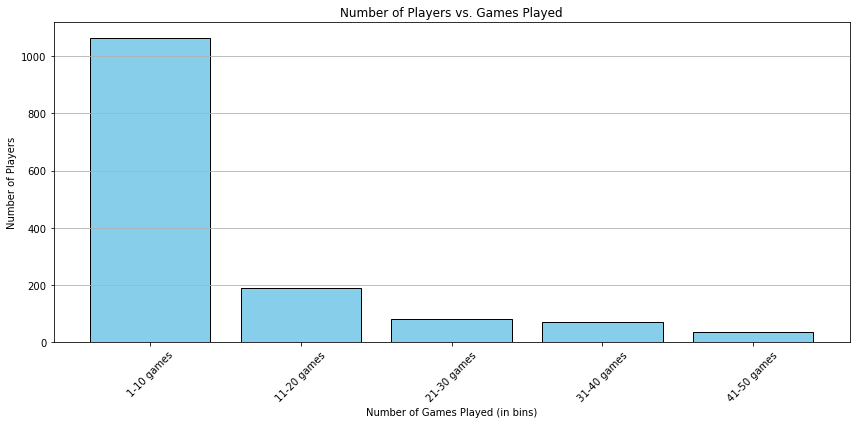

{'1-10 games': 1065, '11-20 games': 188, '21-30 games': 82, '31-40 games': 72, '41-50 games': 37}


In [42]:
# Count games played by each player as a winner and loser

winner_counts = df_selected_columns_without_Davis_cleaned['winner_id'].value_counts()
loser_counts = df_selected_columns_without_Davis_cleaned['loser_id'].value_counts()

# Sum the counts for each player

total_counts = winner_counts.add(loser_counts, fill_value=0)

# Create bins for games played

bins = [(i, i + 9) for i in range(1, 51, 10)]

# Create a dictionary to hold counts of players who've played within each bin

players_in_bins = {}

for start, end in bins:
    players_in_this_bin = total_counts[(total_counts >= start) & (total_counts <= end)].count()
    players_in_bins[f"{start}-{end} games"] = players_in_this_bin

# Plotting

plt.figure(figsize=(12, 6))
plt.bar(players_in_bins.keys(), players_in_bins.values(), color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Number of Players vs. Games Played')
plt.xlabel('Number of Games Played (in bins)')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(players_in_bins)

In [43]:
# Find all unique winner IDs

unique_winner_ids = set(df_selected_columns_without_Davis_cleaned['winner_id'].unique())

# Find all unique loser IDs

unique_loser_ids = set(df_selected_columns_without_Davis_cleaned['loser_id'].unique())

# Check if all winner IDs are in the set of loser IDs

if unique_winner_ids.issubset(unique_loser_ids):
    print("All winner IDs are in the set of loser IDs.")
else:
   
    print("The following winner IDs are not in the set of loser IDs:")
    print(unique_winner_ids - unique_loser_ids)

All winner IDs are in the set of loser IDs.


**Creating a cumulative Players model for each of the 2,097 unique ID's, calculating breakpoints converted**

In [44]:
df_audit_bpoints_sum2 = df_audit_bpoints_sum.copy()

player_stats = {}

for idx, row in df_audit_bpoints_sum2.iterrows():
    
    # For winners, bpconv is calculated as bpFaced by the loser - bpSaved by the loser
    
    winner_id = row['winner_id']
    loser_id = row['loser_id']
    
    # Initialize player stats for winner and loser
    
    for player_id in [winner_id, loser_id]:
        if player_id not in player_stats:
            player_stats[player_id] = {
                'bpconv': []
            }
    
    # Calculate bpconv for the winner and loser based on opponent's stats
    
    winner_bpconv = row['l_bpFaced'] - row['l_bpSaved']
    loser_bpconv = row['w_bpFaced'] - row['w_bpSaved']
    
    # Calculate cumulative bpConv BEFORE current match
    
    if len(player_stats[winner_id]['bpconv']) > 0:
        df_audit_bpoints_sum2.loc[idx, 'winner_bpconv_cum'] = sum(player_stats[winner_id]['bpconv'])
    else:
        df_audit_bpoints_sum2.loc[idx, 'winner_bpconv_cum'] = np.nan
        
    if len(player_stats[loser_id]['bpconv']) > 0:
        df_audit_bpoints_sum2.loc[idx, 'loser_bpconv_cum'] = sum(player_stats[loser_id]['bpconv'])
    else:
        df_audit_bpoints_sum2.loc[idx, 'loser_bpconv_cum'] = np.nan
        
    # Update player stats AFTER current match
    
    player_stats[winner_id]['bpconv'].append(winner_bpconv)
    player_stats[loser_id]['bpconv'].append(loser_bpconv)


#df_audit_bpoints_sum2.to_excel("df_audit_bpoints_sum_new.xlsx")

In [45]:
print(df_audit_bpoints_sum2.isnull().sum())

tourney_id                          0
tourney_name                        0
surface                             0
draw_size                           0
tourney_level                       0
tourney_date                        0
match_num                           0
winner_id                           0
winner_name                         0
winner_ioc                          0
winner_age                          0
loser_id                            0
loser_name                          0
loser_ioc                           0
loser_age                           0
score                               0
best_of                             0
round                               0
w_ace                               0
w_df                                0
w_svpt                              0
w_1stIn                             0
w_1stWon                            0
w_2ndWon                            0
w_SvGms                             0
w_bpSaved                           0
w_bpFaced   

In [46]:
df_audit_bpoints_sum2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,winner_comeback_count,year,winner_bpsaved_cum,winner_bpfaced_cum,loser_bpsaved_cum,loser_bpfaced_cum,winner_bpsaved_cum_percentage,loser_bpsaved_cum_percentage,winner_bpconv_cum,loser_bpconv_cum
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92012,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,1,2023,97.0,161.0,367.0,588.0,0.602484,0.624150,48.0,254.0
92013,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,1,2023,318.0,561.0,611.0,1038.0,0.566845,0.588632,182.0,431.0
92014,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,0,2023,266.0,432.0,227.0,371.0,0.615741,0.611860,168.0,134.0
92015,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,1,2023,71.0,118.0,NaN,NaN,0.601695,NaN,33.0,NaN


**Creating a cumulative Players model for each of the 2,097 unique ID's, adding cumulative breakpoints faced for both players**

In [47]:
player_stats_out_of = {}


for idx, row in df_audit_bpoints_sum2.iterrows():
    for player_type in ['winner', 'loser']:
        player_id_column = f'{player_type}_id'
        player_id = row[player_id_column]

   
        if player_id not in player_stats_out_of:
            player_stats_out_of[player_id] = []

        # Cumulative sum for 'winner_cum_conv_out_of'
        
        if player_type == 'winner':
            if len(player_stats_out_of[player_id]) > 0:
                df_audit_bpoints_sum2.loc[idx, 'winner_cum_conv_out_of'] = sum(player_stats_out_of[player_id])
            else:
                df_audit_bpoints_sum2.loc[idx, 'winner_cum_conv_out_of'] = np.nan
            player_stats_out_of[player_id].append(row['l_bpFaced'])
        
        # Cumulative sum for 'loser_cum_conv_out_of'
        
        if player_type == 'loser':
            if len(player_stats_out_of[player_id]) > 0:
                df_audit_bpoints_sum2.loc[idx, 'loser_cum_conv_out_of'] = sum(player_stats_out_of[player_id])
            else:
                df_audit_bpoints_sum2.loc[idx, 'loser_cum_conv_out_of'] = np.nan
            player_stats_out_of[player_id].append(row['w_bpFaced'])

#df_audit_bpoints_sum2.to_excel("df_audit_bpoints_sum2_updated_new2.xlsx")

In [48]:
print(df_audit_bpoints_sum2.isnull().sum())

tourney_id                          0
tourney_name                        0
surface                             0
draw_size                           0
tourney_level                       0
tourney_date                        0
match_num                           0
winner_id                           0
winner_name                         0
winner_ioc                          0
winner_age                          0
loser_id                            0
loser_name                          0
loser_ioc                           0
loser_age                           0
score                               0
best_of                             0
round                               0
w_ace                               0
w_df                                0
w_svpt                              0
w_1stIn                             0
w_1stWon                            0
w_2ndWon                            0
w_SvGms                             0
w_bpSaved                           0
w_bpFaced   

**Creating percentages for breakpoints saved and converted, both for winner and loser**

In [49]:
# Calculate the percentage for winner

df_audit_bpoints_sum2['winner_bpconv_cum_percentage'] = (df_audit_bpoints_sum2['winner_bpconv_cum'] / df_audit_bpoints_sum2['winner_cum_conv_out_of']) 

# Calculate the percentage for loser

df_audit_bpoints_sum2['loser_bpconv_cum_percentage'] = (df_audit_bpoints_sum2['loser_bpconv_cum'] / df_audit_bpoints_sum2['loser_cum_conv_out_of'])


#df_audit_bpoints_sum2.to_excel("df_audit_bpoints_sum2_updated_3.xlsx")

In [50]:
print(df_audit_bpoints_sum2.isnull().sum())

tourney_id                          0
tourney_name                        0
surface                             0
draw_size                           0
tourney_level                       0
tourney_date                        0
match_num                           0
winner_id                           0
winner_name                         0
winner_ioc                          0
winner_age                          0
loser_id                            0
loser_name                          0
loser_ioc                           0
loser_age                           0
score                               0
best_of                             0
round                               0
w_ace                               0
w_df                                0
w_svpt                              0
w_1stIn                             0
w_1stWon                            0
w_2ndWon                            0
w_SvGms                             0
w_bpSaved                           0
w_bpFaced   

**Creating a cumulative Players model for each of the 2,097 unique ID's, adding cumulative tiebreaks**

In [51]:
#Renaming the columns

df_audit_bpoints_sum2 = df_audit_bpoints_sum2.rename(columns={"w_tiebreaks": "winner_tiebreaks", "l_tiebreaks": "loser_tiebreaks"})


player_tiebreak_stats = {}

df_cum_tiebreak = df_audit_bpoints_sum2.copy()


for idx, row in df_cum_tiebreak.iterrows():
    for player_type in ['winner', 'loser']:
        player_id_column = f'{player_type}_id'
        player_id = row[player_id_column]
        
     
        if player_id not in player_tiebreak_stats:
            player_tiebreak_stats[player_id] = {
                'tiebreaks': [],
                'total_tiebreaks': []
            }
        
        # Calculate cumulative tiebreaks BEFORE current match
        
        if len(player_tiebreak_stats[player_id]['tiebreaks']) > 0:
            df_cum_tiebreak.loc[idx, f'{player_type}_tiebreaks_cum'] = sum(player_tiebreak_stats[player_id]['tiebreaks'])
        else:
            df_cum_tiebreak.loc[idx, f'{player_type}_tiebreaks_cum'] = np.nan
        
        # Calculate cumulative total_tiebreaks BEFORE current match
        
        if len(player_tiebreak_stats[player_id]['total_tiebreaks']) > 0:
            df_cum_tiebreak.loc[idx, f'{player_type}_tiebreaks_out_of'] = sum(player_tiebreak_stats[player_id]['total_tiebreaks'])
        else:
            df_cum_tiebreak.loc[idx, f'{player_type}_tiebreaks_out_of'] = np.nan
        
        # Update player stats AFTER current match
        
        player_tiebreak_stats[player_id]['tiebreaks'].append(row[f'{player_type}_tiebreaks'])
        player_tiebreak_stats[player_id]['total_tiebreaks'].append(row['total_tiebreaks'])

#df_cum_tiebreak.to_excel("df_audit_bpoints_sum2_updated_tiebreak.xlsx")

In [52]:
df_cum_tiebreak

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,winner_bpconv_cum,loser_bpconv_cum,winner_cum_conv_out_of,loser_cum_conv_out_of,winner_bpconv_cum_percentage,loser_bpconv_cum_percentage,winner_tiebreaks_cum,winner_tiebreaks_out_of,loser_tiebreaks_cum,loser_tiebreaks_out_of
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,SWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,YUG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,GER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,GER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92012,2023-0741,Eastbourne,Grass,32,A,20230626,276,126846,Aleksandar Vukic,AUS,...,48.0,254.0,157.0,659.0,0.305732,0.385432,6.0,15.0,48.0,78.0
92013,2023-0741,Eastbourne,Grass,32,A,20230626,275,106296,Gregoire Barrere,FRA,...,182.0,431.0,511.0,1099.0,0.356164,0.392175,22.0,45.0,30.0,53.0
92014,2023-0741,Eastbourne,Grass,32,A,20230626,273,200670,J J Wolf,USA,...,168.0,134.0,389.0,361.0,0.431877,0.371191,11.0,24.0,12.0,24.0
92015,2023-0741,Eastbourne,Grass,32,A,20230626,272,209414,Luca Van Assche,FRA,...,33.0,NaN,80.0,NaN,0.412500,NaN,3.0,8.0,NaN,NaN


In [53]:
df_cum_tiebreak.iloc[:, -20:].isnull().sum()

winner_tiebreaks                    0
loser_tiebreaks                     0
winner_comeback_count               0
year                                0
winner_bpsaved_cum                539
winner_bpfaced_cum                539
loser_bpsaved_cum                1558
loser_bpfaced_cum                1558
winner_bpsaved_cum_percentage     548
loser_bpsaved_cum_percentage     1581
winner_bpconv_cum                 539
loser_bpconv_cum                 1558
winner_cum_conv_out_of            539
loser_cum_conv_out_of            1558
winner_bpconv_cum_percentage      565
loser_bpconv_cum_percentage      1651
winner_tiebreaks_cum              539
winner_tiebreaks_out_of           539
loser_tiebreaks_cum              1558
loser_tiebreaks_out_of           1558
dtype: int64

**Calculating tiebreaks percentages for all players**

In [54]:
# Calculate the tiebreak win percentage for winner

df_cum_tiebreak['winner_tiebreak_cum_percentage'] = (df_cum_tiebreak['winner_tiebreaks_cum'] / df_cum_tiebreak['winner_tiebreaks_out_of']) 

# Calculate the tiebreak win percentage for loser

df_cum_tiebreak['loser_tiebreak_cum_percentage'] = (df_cum_tiebreak['loser_tiebreaks_cum'] / df_cum_tiebreak['loser_tiebreaks_out_of'])

#df_cum_tiebreak.to_excel("df_tiebreak_percentage_new.xlsx")

In [55]:
df_cum_tiebreak.iloc[:, -30:].isnull().sum()

l_2ndWon                             0
l_SvGms                              0
l_bpSaved                            0
l_bpFaced                            0
winner_rank                          0
loser_rank                           0
score_sets                           0
total_tiebreaks                      0
winner_tiebreaks                     0
loser_tiebreaks                      0
winner_comeback_count                0
year                                 0
winner_bpsaved_cum                 539
winner_bpfaced_cum                 539
loser_bpsaved_cum                 1558
loser_bpfaced_cum                 1558
winner_bpsaved_cum_percentage      548
loser_bpsaved_cum_percentage      1581
winner_bpconv_cum                  539
loser_bpconv_cum                  1558
winner_cum_conv_out_of             539
loser_cum_conv_out_of             1558
winner_bpconv_cum_percentage       565
loser_bpconv_cum_percentage       1651
winner_tiebreaks_cum               539
winner_tiebreaks_out_of  

In [56]:
# Filtering rows with discrepancies for the winner

discrepancies_winner = df_cum_tiebreak[
    df_cum_tiebreak['winner_cum_conv_out_of'].notnull() & df_cum_tiebreak['winner_bpconv_cum_percentage'].isnull()
]

# Filtering rows with discrepancies for the loser

discrepancies_loser = df_cum_tiebreak[
    df_cum_tiebreak['loser_cum_conv_out_of'].notnull() & df_cum_tiebreak['loser_bpconv_cum_percentage'].isnull()
]

# Concatenating the results

discrepancies = pd.concat([discrepancies_winner, discrepancies_loser])


print(discrepancies)

      tourney_id     tourney_name surface  draw_size tourney_level  \
62      1991-301         Auckland    Hard         32             A   
178     1991-580  Australian Open    Hard        128             G   
2513    1991-463         Brasilia  Carpet         48             A   
3033    1991-215           Buzios    Hard         32             A   
12431   1994-420        New Haven    Hard         56             A   
...          ...              ...     ...        ...           ...   
89627  2022-7480        Los Cabos    Hard         32             A   
90084  2022-4138         Tel Aviv    Hard         32             A   
90463  2023-9900       United Cup    Hard         18             A   
90465  2023-9900       United Cup    Hard         18             A   
90996  2023-0807         Acapulco    Hard         32             A   

       tourney_date  match_num  winner_id             winner_name winner_ioc  \
62         19910107          3     101179  Jean Philippe Fleurian        FRA   

**Creating a cumulative Players model for each of the 2,097 unique ID's, adding cumulative comebacks**

In [57]:
df_cum_comeback = df_cum_tiebreak.copy()

comeback_counts_by_id = {}

df_cum_comeback['winner_cum_comeback_count'] = np.nan
df_cum_comeback['loser_cum_comeback_count'] = np.nan

for idx, row in df_cum_comeback.iterrows():
    
    # For the winner
    
    if row['winner_id'] not in comeback_counts_by_id:
        comeback_counts_by_id[row['winner_id']] = row['winner_comeback_count']
    else:
        df_cum_comeback.at[idx, 'winner_cum_comeback_count'] = comeback_counts_by_id[row['winner_id']]
        comeback_counts_by_id[row['winner_id']] += row['winner_comeback_count']
        
    # For the loser
    
    if row['loser_id'] not in comeback_counts_by_id:
        comeback_counts_by_id[row['loser_id']] = 0
    else:
        df_cum_comeback.at[idx, 'loser_cum_comeback_count'] = comeback_counts_by_id[row['loser_id']]
        

#df_cum_comeback.to_excel("df_cum_comeback_nulls.xlsx")

In [58]:
df_cum_comeback.iloc[:, -30:].isnull().sum()

l_bpSaved                            0
l_bpFaced                            0
winner_rank                          0
loser_rank                           0
score_sets                           0
total_tiebreaks                      0
winner_tiebreaks                     0
loser_tiebreaks                      0
winner_comeback_count                0
year                                 0
winner_bpsaved_cum                 539
winner_bpfaced_cum                 539
loser_bpsaved_cum                 1558
loser_bpfaced_cum                 1558
winner_bpsaved_cum_percentage      548
loser_bpsaved_cum_percentage      1581
winner_bpconv_cum                  539
loser_bpconv_cum                  1558
winner_cum_conv_out_of             539
loser_cum_conv_out_of             1558
winner_bpconv_cum_percentage       565
loser_bpconv_cum_percentage       1651
winner_tiebreaks_cum               539
winner_tiebreaks_out_of            539
loser_tiebreaks_cum               1558
loser_tiebreaks_out_of   

**Creating a cumulative Players model for each of the 2,097 unique ID's, adding cumulative match counts**

In [59]:
df_match_count = df_cum_comeback.copy()

# Create a dictionary to store cumulative match counts for each player by ID
player_match_counts_by_id = {}

# Initialize the new columns with zeros

df_match_count['winner_cum_match_count'] = 0
df_match_count['loser_cum_match_count'] = 0

# Iterate through the DataFrame rows

for idx, row in df_match_count.iterrows():
    
    # Update for winner_id
    
    if row['winner_id'] not in player_match_counts_by_id:
        player_match_counts_by_id[row['winner_id']] = 0
    df_match_count.at[idx, 'winner_cum_match_count'] = player_match_counts_by_id[row['winner_id']]
    player_match_counts_by_id[row['winner_id']] += 1
    
    # Update for loser_id
    
    if row['loser_id'] not in player_match_counts_by_id:
        player_match_counts_by_id[row['loser_id']] = 0
    df_match_count.at[idx, 'loser_cum_match_count'] = player_match_counts_by_id[row['loser_id']]
    player_match_counts_by_id[row['loser_id']] += 1


#df_match_count.to_excel("df_match_count_final.xlsx")

In [60]:
df_match_count.iloc[:, -30:].isnull().sum()

winner_rank                          0
loser_rank                           0
score_sets                           0
total_tiebreaks                      0
winner_tiebreaks                     0
loser_tiebreaks                      0
winner_comeback_count                0
year                                 0
winner_bpsaved_cum                 539
winner_bpfaced_cum                 539
loser_bpsaved_cum                 1558
loser_bpfaced_cum                 1558
winner_bpsaved_cum_percentage      548
loser_bpsaved_cum_percentage      1581
winner_bpconv_cum                  539
loser_bpconv_cum                  1558
winner_cum_conv_out_of             539
loser_cum_conv_out_of             1558
winner_bpconv_cum_percentage       565
loser_bpconv_cum_percentage       1651
winner_tiebreaks_cum               539
winner_tiebreaks_out_of            539
loser_tiebreaks_cum               1558
loser_tiebreaks_out_of            1558
winner_tiebreak_cum_percentage    1483
loser_tiebreak_cum_percen

In [61]:
# Create a new DataFrame by copying df_match_count

df_selected_columns = df_match_count.copy()

# Rename columns that start with 'w_' to start with 'winner_'

df_selected_columns.columns = ['winner_' + col[2:] if col.startswith('w_') else col for col in df_selected_columns.columns]

# Rename columns that start with 'l_' to start with 'loser_'

df_selected_columns.columns = ['loser_' + col[2:] if col.startswith('l_') else col for col in df_selected_columns.columns]

# Print the number of columns in the updated DataFrame

print("Number of columns in the updated DataFrame:", len(df_selected_columns.columns))


Number of columns in the updated DataFrame: 66


**Removing irrelevant columns**

In [62]:
# List of selected columns

selected_columns = [
    'tourney_id', 'tourney_name', 'surface', 'tourney_level', 'tourney_date',
    'match_num', 'winner_id', 'winner_name', 'winner_ioc', 'loser_id',
    'loser_name', 'loser_ioc', 'best_of', 'round', 'winner_bpSaved',
    'winner_bpFaced', 'loser_bpSaved', 'loser_bpFaced', 'winner_rank',
    'loser_rank', 'score_sets', 'total_tiebreaks', 'winner_tiebreaks',
    'loser_tiebreaks', 'winner_bpsaved_cum', 'winner_bpfaced_cum',
    'loser_bpsaved_cum', 'loser_bpfaced_cum', 'winner_bpsaved_cum_percentage',
    'loser_bpsaved_cum_percentage', 'winner_bpconv_cum', 'loser_bpconv_cum',
    'winner_cum_conv_out_of', 'loser_cum_conv_out_of', 'winner_bpconv_cum_percentage',
    'loser_bpconv_cum_percentage', 'winner_tiebreaks_cum', 'winner_tiebreaks_out_of',
    'loser_tiebreaks_cum', 'loser_tiebreaks_out_of', 'winner_tiebreak_cum_percentage',
    'loser_tiebreak_cum_percentage', 'winner_cum_comeback_count', 'loser_cum_comeback_count',
    'winner_cum_match_count', 'loser_cum_match_count'
]

# Create a new DataFrame by selecting the specific columns

df_selected_columns_revised = df_selected_columns[selected_columns]


# Print the number of columns in the updated DataFrame

print("Number of columns in the revised DataFrame:", len(df_selected_columns_revised.columns))

Number of columns in the revised DataFrame: 46


**Changing winner and loser names to player_A and player_B, adding a target variable column and creating a "random swap" between the players data**

In [63]:
df_target_revised_2 = df_selected_columns_revised.copy()

# Rename the columns from winner/loser to player A and player B

rename_dict = {col: col.replace('winner', 'player_A') if 'winner' in col else col.replace('loser', 'player_B') for col in df_target_revised_2.columns}
df_target_revised_2.rename(columns=rename_dict, inplace=True)

# Generate a random Boolean array to determine which rows to swap

np.random.seed(0)
swap_rows = np.random.choice([True, False], size=len(df_target_revised_2))

# Swap player A and player B data for the randomly selected rows

temp_swap_data = df_target_revised_2.loc[swap_rows].copy()

player_A_cols = [col for col in df_target_revised_2.columns if 'player_A' in col]
player_B_cols = [col for col in df_target_revised_2.columns if 'player_B' in col]

# Assign player B’s data to player A’s for the selected rows

df_target_revised_2.loc[swap_rows, player_A_cols] = df_target_revised_2.loc[swap_rows, player_B_cols].values

# Assign the temporarily stored player B’s data (temp_swap_data) to player A's for the selected rows

df_target_revised_2.loc[swap_rows, player_B_cols] = temp_swap_data[player_A_cols].values

# Create another column and name it match_outcome and assign 1 for all rows.

df_target_revised_2['match_outcome'] = 1

# Change the outcome to 0 for the randomly selected rows that were swapped

df_target_revised_2.loc[swap_rows, 'match_outcome'] = 0

# Print the distribution of the outcome variable

print(df_target_revised_2['match_outcome'].value_counts())

#df_target_revised_2.to_excel("df_target_revised_2.xlsx", index=False)

1    46065
0    45952
Name: match_outcome, dtype: int64


In [64]:
df_target_revised_2.isnull().sum()

# total 24,113 nulls like previously. 

#df_target_revised_2.to_excel("df_before_modelling_pre.xlsx", index=False)

tourney_id                             0
tourney_name                           0
surface                                0
tourney_level                          0
tourney_date                           0
match_num                              0
player_A_id                            0
player_A_name                          0
player_A_ioc                           0
player_B_id                            0
player_B_name                          0
player_B_ioc                           0
best_of                                0
round                                  0
player_A_bpSaved                       0
player_A_bpFaced                       0
player_B_bpSaved                       0
player_B_bpFaced                       0
player_A_rank                          0
player_B_rank                          0
score_sets                             0
total_tiebreaks                        0
player_A_tiebreaks                     0
player_B_tiebreaks                     0
player_A_bpsaved

**Cleaning the "cold start" (first match of each player) rows**

In [65]:
df_coldstart = df_target_revised_2.copy()

# Identify the first game of each player in 'player_A_id' and 'player_B_id'

first_game_A = df_coldstart[df_coldstart['player_A_cum_match_count'] == 0].index
first_game_B = df_coldstart[df_coldstart['player_B_cum_match_count'] == 0].index

# Union the indices of first_game_A and first_game_B

all_first_games = first_game_A.union(first_game_B)

# Remove these rows from the DataFrame

df_coldstart.drop(all_first_games, inplace=True)

# Examine the new DataFrame

print('Number of rows:', df_coldstart.shape[0])
print('Number of columns:', df_coldstart.shape[1])

# Print the number of nulls in each column

print('\nNumber of nulls in each column:')
print(df_coldstart.isnull().sum())

#df_coldstart.to_excel('df_coldstart.xlsx', index=False)

Number of rows: 90014
Number of columns: 47

Number of nulls in each column:
tourney_id                             0
tourney_name                           0
surface                                0
tourney_level                          0
tourney_date                           0
match_num                              0
player_A_id                            0
player_A_name                          0
player_A_ioc                           0
player_B_id                            0
player_B_name                          0
player_B_ioc                           0
best_of                                0
round                                  0
player_A_bpSaved                       0
player_A_bpFaced                       0
player_B_bpSaved                       0
player_B_bpFaced                       0
player_A_rank                          0
player_B_rank                          0
score_sets                             0
total_tiebreaks                        0
player_A_tiebreaks   

**Checking the difference between 92,017 previously and the new 90,014 count. There are exactly 94 "common" games where the first game is for both player_A and player_B**

In [66]:
# Find the indices of first games for each player when they are player A

first_game_A_idx = df_target_revised_2[df_target_revised_2['player_A_cum_match_count'] == 0].index

# Find the indices of first games for each player when they are player B

first_game_B_idx = df_target_revised_2[df_target_revised_2['player_B_cum_match_count'] == 0].index

# Find the common indices between the two Series, which represent games where both players are playing their first game

common_first_games_idx = first_game_A_idx.intersection(first_game_B_idx)

# Print the number of such common first games

print("Number of common first games:", len(common_first_games_idx))


Number of common first games: 94


**"New" distribution of the target variable**

In [67]:
# Group by the 'match_outcome' column and count the number of occurrences of each class

target_class_distribution = df_coldstart['match_outcome'].value_counts()


print(target_class_distribution)

#df_coldstart_revise

1    45031
0    44983
Name: match_outcome, dtype: int64


**Removing the reamaining rows with null values, once by ascending, and once by descending order to validate the results**

In [68]:
df_newclean_1 = df_coldstart.copy()

# Sort columns by the number of nulls, in ascending order

sorted_columns_by_nulls_asc = df_newclean_1.isnull().sum().sort_values().index

# Loop through the sorted columns and drop rows with null values

for col in sorted_columns_by_nulls_asc:
    df_newclean_1.dropna(subset=[col], inplace=True)

# Print the results after cleaning

print("Shape of df_newclean_1:", df_newclean_1.shape)

print("\nNumber of nulls in each column of df_newclean_1:")

print(df_newclean_1.isnull().sum())

Shape of df_newclean_1: (87187, 47)

Number of nulls in each column of df_newclean_1:
tourney_id                          0
tourney_name                        0
surface                             0
tourney_level                       0
tourney_date                        0
match_num                           0
player_A_id                         0
player_A_name                       0
player_A_ioc                        0
player_B_id                         0
player_B_name                       0
player_B_ioc                        0
best_of                             0
round                               0
player_A_bpSaved                    0
player_A_bpFaced                    0
player_B_bpSaved                    0
player_B_bpFaced                    0
player_A_rank                       0
player_B_rank                       0
score_sets                          0
total_tiebreaks                     0
player_A_tiebreaks                  0
player_B_tiebreaks                  0
pl

In [69]:
df_newclean_2 = df_coldstart.copy()

# Sort columns by the number of nulls, in descending order

sorted_columns_by_nulls_desc = df_newclean_2.isnull().sum().sort_values(ascending=False).index

# Loop through the sorted columns and drop rows with null values

for col in sorted_columns_by_nulls_desc:
    df_newclean_2.dropna(subset=[col], inplace=True)

# Print the results after cleaning

print("Shape of df_newclean_2:", df_newclean_2.shape)

print("\nNumber of nulls in each column of df_newclean_2:")

print(df_newclean_2.isnull().sum())

Shape of df_newclean_2: (87187, 47)

Number of nulls in each column of df_newclean_2:
tourney_id                          0
tourney_name                        0
surface                             0
tourney_level                       0
tourney_date                        0
match_num                           0
player_A_id                         0
player_A_name                       0
player_A_ioc                        0
player_B_id                         0
player_B_name                       0
player_B_ioc                        0
best_of                             0
round                               0
player_A_bpSaved                    0
player_A_bpFaced                    0
player_B_bpSaved                    0
player_B_bpFaced                    0
player_A_rank                       0
player_B_rank                       0
score_sets                          0
total_tiebreaks                     0
player_A_tiebreaks                  0
player_B_tiebreaks                  0
pl

**Creating the final features as differences between the 2 players. This part must be done after cleaning the missing values and creating the random swap**

In [70]:
df_differences_2 = df_newclean_1.copy()

# Creating Difference Features

df_differences_2['ranking_diff'] = df_differences_2['player_A_rank'] - df_differences_2['player_B_rank']
df_differences_2['bpsaved_cum_percentage_diff'] = df_differences_2['player_A_bpsaved_cum_percentage'] - df_differences_2['player_B_bpsaved_cum_percentage']
df_differences_2['bpconv_cum_percentage_diff'] = df_differences_2['player_A_bpconv_cum_percentage'] - df_differences_2['player_B_bpconv_cum_percentage']
df_differences_2['tiebreak_cum_percentage_diff'] = df_differences_2['player_A_tiebreak_cum_percentage'] - df_differences_2['player_B_tiebreak_cum_percentage']
df_differences_2['cum_comeback_count_diff'] = df_differences_2['player_A_cum_comeback_count'] - df_differences_2['player_B_cum_comeback_count']

# Rearranging columns to have 'match_outcome' as the last column

cols = [col for col in df_differences_2.columns if col != 'match_outcome']
cols.append('match_outcome')
df_differences_2 = df_differences_2[cols]

# Printing the Number of Columns and Rows

num_rows, num_columns = df_differences_2.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

# Printing the Number of Nulls in Each Column

null_count = df_differences_2.isnull().sum()
print()
print('Number of Nulls in Each Column:')
print(null_count)

#df_differences_2.to_excel("df_before_modelling.xlsx", index=False)

Number of Rows: 87187
Number of Columns: 52

Number of Nulls in Each Column:
tourney_id                          0
tourney_name                        0
surface                             0
tourney_level                       0
tourney_date                        0
match_num                           0
player_A_id                         0
player_A_name                       0
player_A_ioc                        0
player_B_id                         0
player_B_name                       0
player_B_ioc                        0
best_of                             0
round                               0
player_A_bpSaved                    0
player_A_bpFaced                    0
player_B_bpSaved                    0
player_B_bpFaced                    0
player_A_rank                       0
player_B_rank                       0
score_sets                          0
total_tiebreaks                     0
player_A_tiebreaks                  0
player_B_tiebreaks                  0
player_A_bp

**Creating the final dataframe for the model**

In [71]:
# Creating the new dataframe with selected columns

df_selected_features_re = df_differences_2[['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'cum_comeback_count_diff', 'match_outcome']].copy()

# Rename the column for clarity 

df_selected_features_re.rename(columns={'cum_comeback_count_diff': 'comeback_cum_count_diff'}, inplace=True)

# Updating raw DF for consistency

df_differences_2.rename(columns={'cum_comeback_count_diff': 'comeback_cum_count_diff'}, inplace=True)

# Printing details for new DF

print(f"Number of rows: {df_selected_features_re.shape[0]}")
print(f"Number of columns: {df_selected_features_re.shape[1]}")
print("\nNumber of nulls in each column:")
print(df_selected_features_re.isnull().sum())

#df_selected_features_re.to_excel("df_selected_features_re.xlsx", index=False





Number of rows: 87187
Number of columns: 6

Number of nulls in each column:
ranking_diff                    0
bpsaved_cum_percentage_diff     0
bpconv_cum_percentage_diff      0
tiebreak_cum_percentage_diff    0
comeback_cum_count_diff         0
match_outcome                   0
dtype: int64


**Descriptive Statistics of the final dataframe**

In [72]:
df_selected_features_re

,ranking_diff,bpsaved_cum_percentage_diff,bpconv_cum_percentage_diff,tiebreak_cum_percentage_diff,comeback_cum_count_diff,match_outcome
15,248.0,0.400000,0.250000,0.000000,0.0,0
21,10.0,0.050000,-0.033333,0.000000,0.0,1
63,7.0,-0.050000,0.157143,0.500000,1.0,0
69,18.0,0.085714,-0.002381,-0.500000,0.0,0
79,44.0,0.384615,0.062500,0.000000,-1.0,0
...,...,...,...,...,...,...
92011,-18.0,0.025615,-0.027920,-0.074786,15.0,1
92012,40.0,-0.021665,-0.079700,-0.215385,-5.0,1
92013,12.0,-0.021787,-0.036010,-0.077149,-7.0,1
92014,-14.0,-0.003881,-0.060685,0.041667,-1.0,0


In [73]:
shape = df_selected_features_re.shape
print(shape)

(87187, 6)


In [74]:
df_selected_features_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87187 entries, 15 to 92016
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ranking_diff                  87187 non-null  float64
 1   bpsaved_cum_percentage_diff   87187 non-null  float64
 2   bpconv_cum_percentage_diff    87187 non-null  float64
 3   tiebreak_cum_percentage_diff  87187 non-null  float64
 4   comeback_cum_count_diff       87187 non-null  float64
 5   match_outcome                 87187 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.7 MB


In [75]:
df_selected_features_re.isnull().sum()

ranking_diff                    0
bpsaved_cum_percentage_diff     0
bpconv_cum_percentage_diff      0
tiebreak_cum_percentage_diff    0
comeback_cum_count_diff         0
match_outcome                   0
dtype: int64

In [76]:
types = df_selected_features_re.dtypes
print(types)

ranking_diff                    float64
bpsaved_cum_percentage_diff     float64
bpconv_cum_percentage_diff      float64
tiebreak_cum_percentage_diff    float64
comeback_cum_count_diff         float64
match_outcome                     int64
dtype: object


In [77]:
df_selected_features_re.describe()

,ranking_diff,bpsaved_cum_percentage_diff,bpconv_cum_percentage_diff,tiebreak_cum_percentage_diff,comeback_cum_count_diff,match_outcome
count,87187.000000,87187.000000,87187.000000,87187.000000,87187.000000,87187.000000
mean,0.022962,0.000013,0.000186,0.000003,-0.061729,0.499925
std,108.732839,0.056630,0.055992,0.184315,31.271477,0.500003
min,-1669.000000,-0.628714,-0.647696,-1.000000,-138.000000,0.000000
25%,-40.000000,-0.031902,-0.028571,-0.087171,-15.000000,0.000000
50%,1.000000,-0.000104,-0.000026,0.000000,0.000000,0.000000
75%,40.000000,0.031811,0.028781,0.086214,15.000000,1.000000
max,1815.000000,0.621748,0.662776,1.000000,138.000000,1.000000


In [78]:
class_counts = df_selected_features_re.groupby('match_outcome').size()
print(class_counts)
print()

# Calculate total number of observations
total = class_counts.sum()

print(f"Total number of observations: {total}\n")

# Print the percentage of each class
for class_name, count in class_counts.items():
    percentage = (count / total) * 100
    print(f"{class_name}: {percentage:.2f}%")

match_outcome
0    43600
1    43587
dtype: int64

Total number of observations: 87187

0: 50.01%
1: 49.99%


**Correlations**

In [79]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
correlations = df_selected_features_re.corr(method='pearson')
correlations

,ranking_diff,bpsaved_cum_percentage_diff,bpconv_cum_percentage_diff,tiebreak_cum_percentage_diff,comeback_cum_count_diff,match_outcome
ranking_diff,1.000,-0.184,-0.135,-0.142,-0.268,-0.237
bpsaved_cum_percentage_diff,-0.184,1.000,-0.169,0.128,0.262,0.156
bpconv_cum_percentage_diff,-0.135,-0.169,1.000,0.028,0.201,0.092
tiebreak_cum_percentage_diff,-0.142,0.128,0.028,1.000,0.188,0.096
comeback_cum_count_diff,-0.268,0.262,0.201,0.188,1.000,0.191
match_outcome,-0.237,0.156,0.092,0.096,0.191,1.000


<AxesSubplot:>

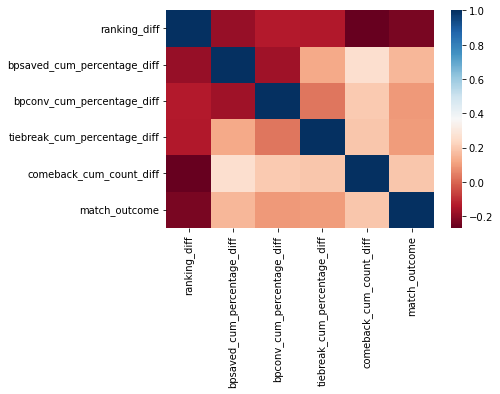

In [80]:
import seaborn as sns 
sns.heatmap(df_selected_features_re.corr(method='pearson'),cmap = 'RdBu')

In [81]:
skew = df_selected_features_re.skew()
print(skew)

ranking_diff                    5.841e-03
bpsaved_cum_percentage_diff     3.693e-02
bpconv_cum_percentage_diff      2.145e-01
tiebreak_cum_percentage_diff    1.608e-02
comeback_cum_count_diff        -5.113e-03
match_outcome                   2.982e-04
dtype: float64


**Plots**


**Histogram**

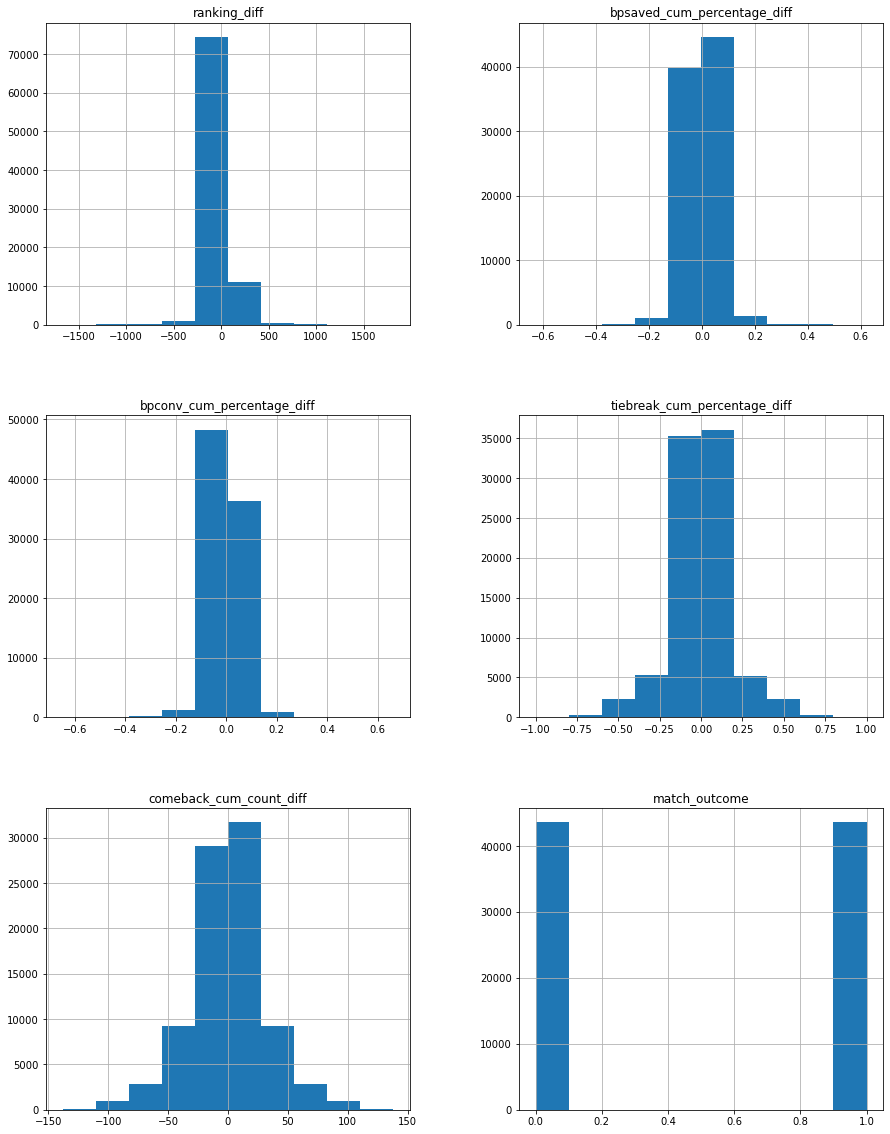

In [82]:
df_selected_features_re.hist(figsize = (15,20))
plt.show()

**Density Plot**

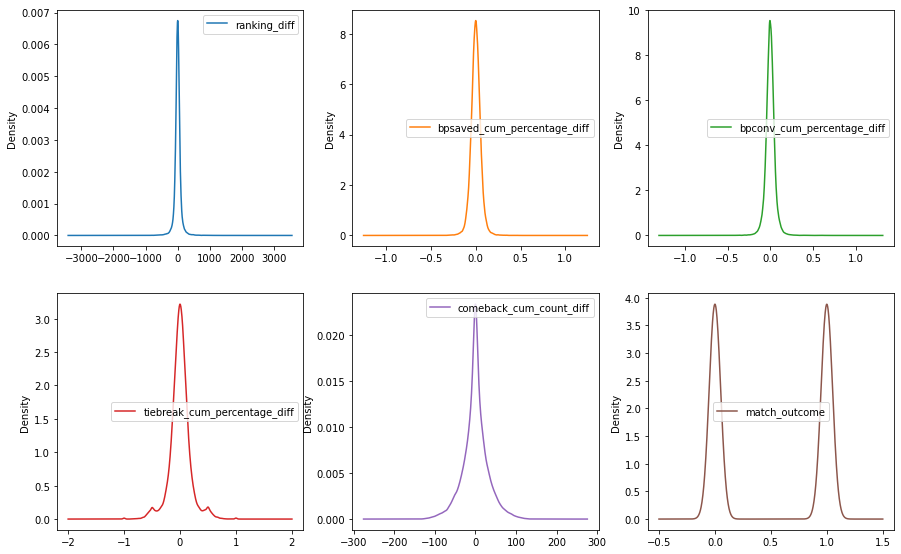

In [83]:
df_selected_features_re.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize = (15,20))
plt.show()

**Box and Whisker Plots**

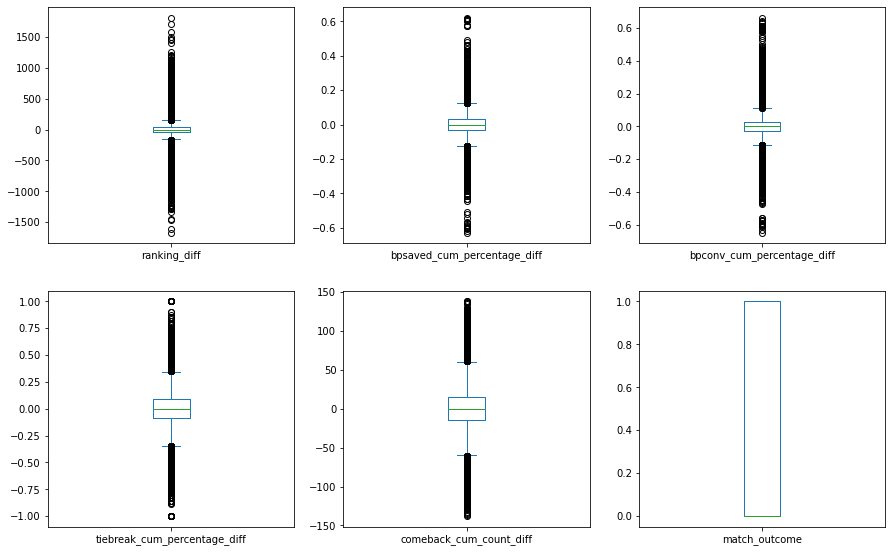

In [84]:
df_selected_features_re.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize = (15,20))
plt.show()

**Correlation Matrix Plot**

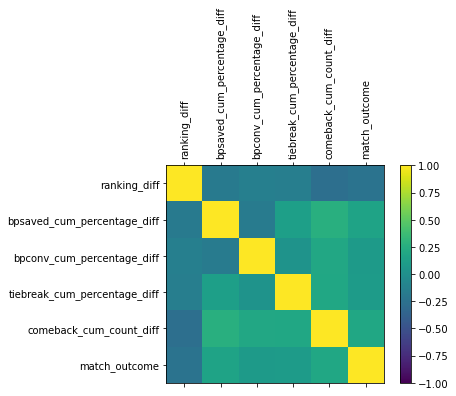

In [85]:
# Correlation Matrix Plot (generic)
from matplotlib import pyplot


correlations = df_selected_features_re.corr()

# plot correlation matrix

fig = pyplot.figure()
names = ['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'comeback_cum_count_diff','match_outcome']

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)

pyplot.show()

**Scatter Plot Matrix**

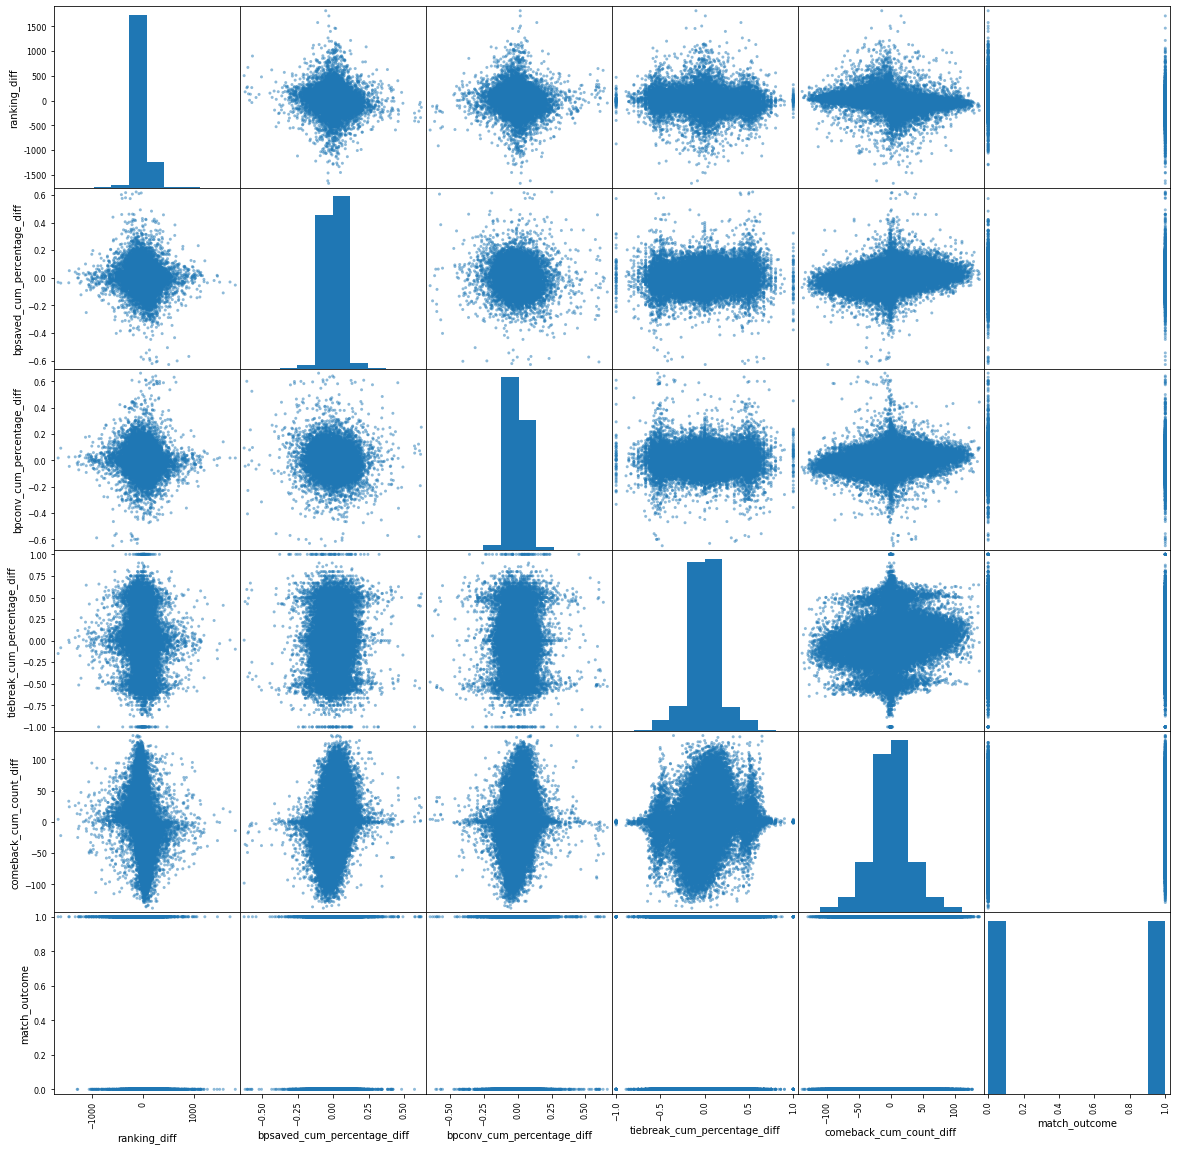

In [86]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_selected_features_re, figsize=[20, 20])
plt.show()

**Checking for duplicates**

In [87]:
duplicates = df_selected_features_re[df_selected_features_re.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")

if not duplicates.empty:
    print("\nDuplicate rows:")
    print(duplicates)

Number of duplicate rows: 0


**Checking for outliers**

In [88]:
def detect_outliers(dataframe):
    
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR)))
    return outliers

# Detect outliers in df_selected_features_re
outliers = detect_outliers(df_selected_features_re)

print(outliers)

       ranking_diff  bpsaved_cum_percentage_diff  bpconv_cum_percentage_diff  \
15             True                         True                        True   
21            False                        False                       False   
63            False                        False                        True   
69            False                        False                       False   
79            False                         True                       False   
...             ...                          ...                         ...   
92011         False                        False                       False   
92012         False                        False                       False   
92013         False                        False                       False   
92014         False                        False                       False   
92016         False                        False                       False   

       tiebreak_cum_percentage_diff  co

In [89]:
def detect_outliers(dataframe):
    
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    outliers_boolean = ((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR)))
    return outliers_boolean

outliers = detect_outliers(df_selected_features_re)

# Calculate the number of outliers for each column
outliers_count = outliers.sum()

print(outliers_count)

ranking_diff                    6374
bpsaved_cum_percentage_diff     2568
bpconv_cum_percentage_diff      3657
tiebreak_cum_percentage_diff    6628
comeback_cum_count_diff         6244
match_outcome                      0
dtype: int64


**Train/Test Split**


**Train/Test Split Option 1: K-Fold Cross Validation, 10 Folds**

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Copying the original dataframe for safety
df_split1 = df_selected_features_re.copy()

# Extracting features and target variable
X = df_split1.drop("match_outcome", axis=1)
y = df_split1["match_outcome"]

# Define the scaler outside the loop
scaler = StandardScaler()

# Define the cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through the 10 splits
for idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Extract train and test subsets for this fold
    X_train_random, X_test_random = X.iloc[train_idx], X.iloc[test_idx]
    y_train_random, y_test_random = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the scaler on the training data and transform both train and test data
    X_train_random = scaler.fit_transform(X_train_random)
    X_test_random = scaler.transform(X_test_random)

    # Display the shape and first few rows of each scaled split for verification
    print(f"Random CV - Split {idx + 1}")
    print("X_train_random shape:", X_train_random.shape)
    print("y_train_random shape:", y_train_random.shape)
    print("X_test_random shape:", X_test_random.shape)
    print("y_test_random shape:", y_test_random.shape)

    # Auditing the scaled split:
    print("\nFirst few rows of X_train_random:")
    print(X_train_random[:5])
    print("\nDistribution of target variable in training set:")
    print(y_train_random.value_counts())
    print("============================================")

Random CV - Split 1
X_train_random shape: (78468, 5)
y_train_random shape: (78468,)
X_test_random shape: (8719, 5)
y_test_random shape: (8719,)

First few rows of X_train_random:
[[ 2.27484671e+00  7.06362794e+00  4.46303304e+00 -1.25032581e-03
   2.80340568e-03]
 [ 9.15386427e-02  8.83650366e-01 -5.98083158e-01 -1.25032581e-03
   2.80340568e-03]
 [ 6.40179527e-02 -8.82057512e-01  2.80434790e+00  2.71338005e+00
   3.47954995e-02]
 [ 1.64927149e-01  1.51426032e+00 -4.51881108e-02 -2.71588070e+00
   2.80340568e-03]
 [ 4.03439796e-01  6.79198057e+00  1.11376497e+00 -1.25032581e-03
  -2.91886881e-02]]

Distribution of target variable in training set:
0    39248
1    39220
Name: match_outcome, dtype: int64
Random CV - Split 2
X_train_random shape: (78468, 5)
y_train_random shape: (78468,)
X_test_random shape: (8719, 5)
y_test_random shape: (8719,)

First few rows of X_train_random:
[[ 2.27930621e+00  7.05347550e+00  4.46398164e+00 -4.18663557e-04
   1.50335125e-03]
 [ 9.32417223e-02  8.8018

**Checking Average Accuracy for K-Fold CV Split with Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model outside the loop
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')

accuracies = []


for idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train_random, X_test_random = X.iloc[train_idx], X.iloc[test_idx]
    y_train_random, y_test_random = y.iloc[train_idx], y.iloc[test_idx]

    X_train_random = scaler.fit_transform(X_train_random)
    X_test_random = scaler.transform(X_test_random)
    
    # Fit the model on training data
    log_reg.fit(X_train_random, y_train_random)
    
    # Predict on the test set
    y_pred = log_reg.predict(X_test_random)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_random, y_pred)
    accuracies.append(accuracy)
    
    print(f"Fold {idx+1} Accuracy: {accuracy:.4f}")

average_accuracy = sum(accuracies)/len(accuracies)
print(f"\nAverage Accuracy across all folds: {average_accuracy:.4f}")

Fold 1 Accuracy: 0.6414
Fold 2 Accuracy: 0.6415
Fold 3 Accuracy: 0.6333
Fold 4 Accuracy: 0.6360
Fold 5 Accuracy: 0.6315
Fold 6 Accuracy: 0.6403
Fold 7 Accuracy: 0.6428
Fold 8 Accuracy: 0.6336
Fold 9 Accuracy: 0.6403
Fold 10 Accuracy: 0.6423

Average Accuracy across all folds: 0.6383


**Checking best "k" for "k-nearest neighbors"**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with weights='uniform' which is the default

best_k = None
best_accuracy = 0.0

for k in range(1, 21):  # trying from 1 to 20 neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    
    accuracies = []
    
    for idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        
        X_train_random, X_test_random = X.iloc[train_idx], X.iloc[test_idx]
        y_train_random, y_test_random = y.iloc[train_idx], y.iloc[test_idx]

      
        X_train_random = scaler.fit_transform(X_train_random)
        X_test_random = scaler.transform(X_test_random)

       
        model.fit(X_train_random, y_train_random)

        
        y_pred = model.predict(X_test_random)

        # Calculate accuracy
        accuracy = accuracy_score(y_test_random, y_pred)
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies)/len(accuracies)
    
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_k = k
    
    print(f"K={k} Average Accuracy: {average_accuracy:.4f}")

print(f"\nBest K: {best_k} with Average Accuracy: {best_accuracy:.4f}")

K=1 Average Accuracy: 0.5627
K=2 Average Accuracy: 0.5603
K=3 Average Accuracy: 0.5831
K=4 Average Accuracy: 0.5829
K=5 Average Accuracy: 0.5968
K=6 Average Accuracy: 0.5960
K=7 Average Accuracy: 0.6042
K=8 Average Accuracy: 0.6051
K=9 Average Accuracy: 0.6092
K=10 Average Accuracy: 0.6097
K=11 Average Accuracy: 0.6141
K=12 Average Accuracy: 0.6150
K=13 Average Accuracy: 0.6177
K=14 Average Accuracy: 0.6168
K=15 Average Accuracy: 0.6207
K=16 Average Accuracy: 0.6212
K=17 Average Accuracy: 0.6217
K=18 Average Accuracy: 0.6229
K=19 Average Accuracy: 0.6249
K=20 Average Accuracy: 0.6252

Best K: 20 with Average Accuracy: 0.6252


**Evaluations for all models using K-Fold CV Split**

LR:
Average Accuracy: 0.6383 ± 0.0040
Average F1-Score: 0.6384
Average Log Loss: 12.4926
Average AUC: 0.6850
Classification Report (Last Fold):
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      4369
           1       0.64      0.65      0.64      4349

    accuracy                           0.64      8718
   macro avg       0.64      0.64      0.64      8718
weighted avg       0.64      0.64      0.64      8718

Confusion Matrix (Last Fold):
[[2793 1576]
 [1542 2807]]


LDA:
Average Accuracy: 0.6338 ± 0.0042
Average F1-Score: 0.6339
Average Log Loss: 12.6491
Average AUC: 0.6809
Classification Report (Last Fold):
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      4369
           1       0.64      0.64      0.64      4349

    accuracy                           0.64      8718
   macro avg       0.64      0.64      0.64      8718
weighted avg       0.64      0.64      0.64      8718

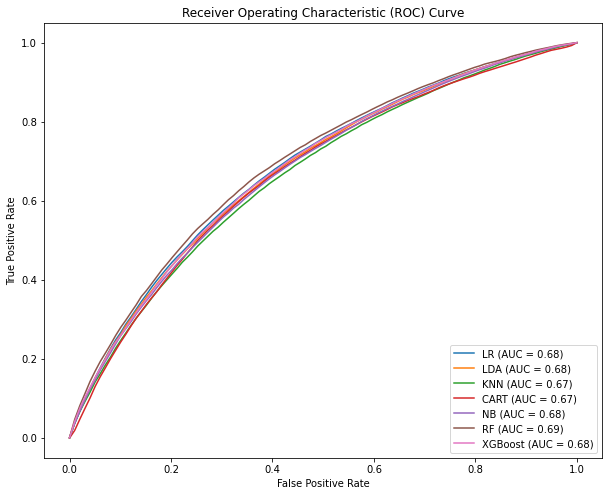

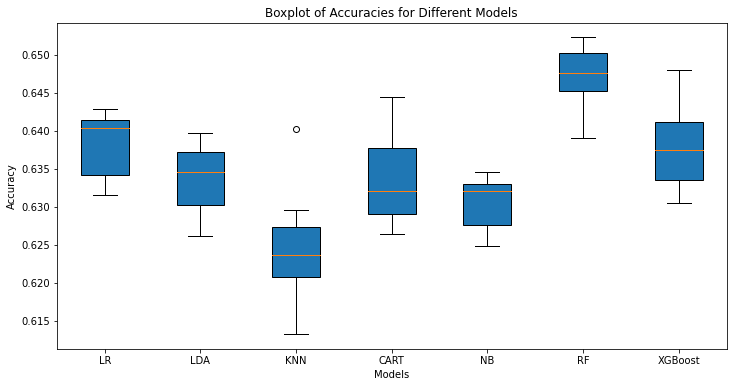

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss, classification_report, f1_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

#import xgb

seed = 42

models = [
    ('LR', LogisticRegression(max_iter=10000, C=1.0)),
    ('LDA', LinearDiscriminantAnalysis(solver='svd')),
    ('KNN', KNeighborsClassifier(n_neighbors=20, weights='distance')),
    ('CART', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)),
    ('NB', GaussianNB(var_smoothing=1e-9)),
    ('RF', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=seed, min_samples_leaf=4)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Dictionary to capture accuracies for the boxplot
model_accuracies = {name: [] for name, _ in models}

plt.figure(figsize=(10, 8))

for name, model in models:
    accuracies = []
    confusion_matrices = []
    auc_scores = []
    log_losses = []
    f1_scores = []
    classification_reports = []
    tpr_list = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for idx, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train_random, X_test_random = X.iloc[train_idx], X.iloc[test_idx]
        y_train_random, y_test_random = y.iloc[train_idx], y.iloc[test_idx]

        X_train_random = scaler.fit_transform(X_train_random)
        X_test_random = scaler.transform(X_test_random)

        # Fit the model on training data
        model.fit(X_train_random, y_train_random)

        # Predict on the test set
        y_pred = model.predict(X_test_random)
        
        # Evaluation Metrics
        accuracies.append(accuracy_score(y_test_random, y_pred))
        confusion_matrices.append(confusion_matrix(y_test_random, y_pred))
        f1_scores.append(f1_score(y_test_random, y_pred))
        log_losses.append(log_loss(y_test_random, y_pred))
        classification_reports.append(classification_report(y_test_random, y_pred))
        
        # AUC calculations
        y_pred_proba = model.predict_proba(X_test_random)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_random, y_pred_proba)
        tpr_list.append(np.interp(mean_fpr, fpr, tpr))
        auc_scores.append(roc_auc_score(y_test_random, y_pred_proba))

    # Average Metrics
    avg_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    avg_f1 = np.mean(f1_scores)
    avg_log_loss = np.mean(log_losses)
    avg_auc = np.mean(auc_scores)

    # ROC Curve Plot
    mean_tpr = np.mean(tpr_list, axis=0)
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {avg_auc:.2f})')

    # Adding the accuracy scores to the dictionary for boxplot
    model_accuracies[name] = accuracies

    # Print statements for the metrics
    print(f"{name}:")
    print(f"Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Average F1-Score: {avg_f1:.4f}")
    print(f"Average Log Loss: {avg_log_loss:.4f}")
    print(f"Average AUC: {avg_auc:.4f}")
    print(f"Classification Report (Last Fold):")
    print(classification_reports[-1])
    print(f"Confusion Matrix (Last Fold):")
    print(confusion_matrices[-1])
    print("\n")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Boxplot for accuracies
plt.figure(figsize=(12, 6))
plt.boxplot(model_accuracies.values(), vert=True, patch_artist=True)
plt.xticks(list(range(1, len(models) + 1)), model_accuracies.keys())
plt.title('Boxplot of Accuracies for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()


****Train/Test Split Option 2: Temporal Split, training:1991-2021, testing: 2022-2023**

In [94]:
# 1. Copy df_differences_2 to df_split2
df_split2 = df_differences_2.copy()

# 2. Temporal split using tourney_date
train_data_temporal = df_split2[df_split2['tourney_date'] <= 20211231]
test_data_temporal = df_split2[df_split2['tourney_date'] > 20211231]

# 3. Retain only the selected features
selected_columns = df_selected_features_re.columns
train_data_temporal = train_data_temporal[selected_columns]
test_data_temporal = test_data_temporal[selected_columns]

# 4. Separate features and target
X_train_temporal = train_data_temporal.drop("match_outcome", axis=1)
y_train_temporal = train_data_temporal["match_outcome"]

X_test_temporal = test_data_temporal.drop("match_outcome", axis=1)
y_test_temporal = test_data_temporal["match_outcome"]

# 5. Scale the data
scaler_temporal = StandardScaler()
X_train_temporal = scaler_temporal.fit_transform(X_train_temporal)
X_test_temporal = scaler_temporal.transform(X_test_temporal)

# 6. Verification and Audit
print("Temporal Split")
print("X_train shape:", X_train_temporal.shape)
print("y_train shape:", y_train_temporal.shape)
print("X_test shape:", X_test_temporal.shape)
print("y_test shape:", y_test_temporal.shape)

# Auditing the split:
print("\nFirst few rows of X_train:")
print(X_train_temporal[:5])
print("\nDistribution of target variable in training set:")
print(y_train_temporal.value_counts())

Temporal Split
X_train shape: (83124, 5)
y_train shape: (83124,)
X_test shape: (4063, 5)
y_test shape: (4063,)

First few rows of X_train:
[[ 2.27190946e+00  7.03097489e+00  4.44117955e+00 -1.05763780e-03
   2.59053047e-03]
 [ 9.20897385e-02  8.78001678e-01 -5.96580362e-01 -1.05763780e-03
   2.59053047e-03]
 [ 6.46130193e-02 -8.79990669e-01  2.79014899e+00  2.69584196e+00
   3.50743522e-02]
 [ 1.65360990e-01  1.50585609e+00 -4.62368426e-02 -2.69795724e+00
   2.59053047e-03]
 [ 4.03492556e-01  6.76051453e+00  1.10736784e+00 -1.05763780e-03
  -2.98932913e-02]]

Distribution of target variable in training set:
1    41606
0    41518
Name: match_outcome, dtype: int64


**Checking Accuracy for Temporal Split for all models**

In [95]:
# Define the models with the suggested parameters
models = {
    "LogReg": LogisticRegression(max_iter=10000),
    "LDA": LinearDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(n_neighbors=20),
    "CART": DecisionTreeClassifier(max_depth=5, random_state=42),
    "NB": GaussianNB(),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    #"SVM": SVC(kernel='linear', C=1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_temporal, y_train_temporal)

    # Make predictions
    y_pred = model.predict(X_test_temporal)

    # Evaluate and print accuracy
    accuracy = accuracy_score(y_test_temporal, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    

LogReg Accuracy: 0.6232
LDA Accuracy: 0.6101
KNN Accuracy: 0.6143
CART Accuracy: 0.6352
NB Accuracy: 0.6045
RF Accuracy: 0.6357
XGBoost Accuracy: 0.6284


**Train/Test Split Option 3: Time Series Cross-Validation, 10 Folds**

In [96]:
# Making a copy
df_split3 = df_differences_2.copy()

X = df_split3.drop(columns=['match_outcome'])
y = df_split3['match_outcome']

# Columns from the selected features DataFrame
selected_columns = df_selected_features_re.columns

tscv = TimeSeriesSplit(n_splits=10)
fold_num = 0

# Define the scaler outside the loop
scaler_time_based = StandardScaler()

for train_index, test_index in tscv.split(X):
    fold_num += 1
    X_train_df, X_test_df = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Print year range for train and test set
    train_start_year = X_train_df['tourney_date'].min() // 10000  # Extract year by integer division
    train_end_year = X_train_df['tourney_date'].max() // 10000
    
    test_start_year = X_test_df['tourney_date'].min() // 10000
    test_end_year = X_test_df['tourney_date'].max() // 10000
    
    # Use only the selected columns for X_train and X_test
    X_train_df = X_train_df[selected_columns[:-1]]  # All except 'match_outcome'
    X_test_df = X_test_df[selected_columns[:-1]]    # All except 'match_outcome'
    
    # Scale the data
    X_train = scaler_time_based.fit_transform(X_train_df)
    X_test = scaler_time_based.transform(X_test_df)
    
    print(f"Fold {fold_num}")
    print("-" * 40)
    
    # Print year ranges
    print(f"Training Set Year Range: {train_start_year} - {train_end_year}")
    print(f"Test Set Year Range: {test_start_year} - {test_end_year}")
    
    # Verification and Audit
    print("\nTime-Based CV Split")
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)

    # Auditing the split:
    print("\nFirst few rows of X_train:")
    print(X_train[:5, :])  
    print("\nDistribution of target variable in training set:")
    print(pd.Series(y_train).value_counts(normalize=True))
    print("\n")

Fold 1
----------------------------------------
Training Set Year Range: 1990 - 1993
Test Set Year Range: 1993 - 1996

Time-Based CV Split
X_train shape: (7927, 5)
y_train shape: (7927,)
X_test shape: (7926, 5)
y_test shape: (7926,)

First few rows of X_train:
[[ 2.41902312e+00  5.50202213e+00  3.59668558e+00 -2.36222009e-03
   8.28192635e-03]
 [ 9.58797530e-02  6.78084648e-01 -4.84415055e-01 -2.36222009e-03
   8.28192635e-03]
 [ 6.65964333e-02 -7.00183203e-01  2.25918201e+00  1.89221834e+00
   1.61314164e-01]
 [ 1.73968606e-01  1.17032317e+00 -3.85805309e-02 -1.89694278e+00
   8.28192635e-03]
 [ 4.27757376e-01  5.28998092e+00  8.95957220e-01 -2.36222009e-03
  -1.44750312e-01]]

Distribution of target variable in training set:
1    0.504
0    0.496
Name: match_outcome, dtype: float64


Fold 2
----------------------------------------
Training Set Year Range: 1990 - 1996
Test Set Year Range: 1996 - 1998

Time-Based CV Split
X_train shape: (15853, 5)
y_train shape: (15853,)
X_test shape: 

**Checking Average Accuracy for Time-Series CV for all models**

In [97]:
seed = 42

# Define models
models = [
    ('LR', LogisticRegression(max_iter=10000, C=1.0)),
    ('LDA', LinearDiscriminantAnalysis(solver='svd')),
    ('KNN', KNeighborsClassifier(n_neighbors=20, weights='distance')),
    ('CART', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,random_state=42)),
    ('NB', GaussianNB(var_smoothing=1e-9)),
    ('RF', RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=seed)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

results = {name: [] for name, _ in models}

# Model training and evaluation
for name, model in models:
    for train_index, test_index in tscv.split(X):
        X_train_df, X_test_df = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Use only the selected columns for X_train and X_test
        X_train_df = X_train_df[selected_columns[:-1]]
        X_test_df = X_test_df[selected_columns[:-1]]
        
        # Scale the data
        X_train = scaler_time_based.fit_transform(X_train_df)
        X_test = scaler_time_based.transform(X_test_df)
        
        # Training the model
        model.fit(X_train, y_train)
        
        # Prediction
        y_pred = model.predict(X_test)
        
        # Storing the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[name].append(accuracy)

# Average accuracy and SD for each model
for name, acc_list in results.items():
    avg_acc = np.mean(acc_list)
    std_acc = np.std(acc_list)
    print(f"{name}: Average Accuracy = {avg_acc:.4f} (+/- {std_acc:.4f})")
    

LR: Average Accuracy = 0.6354 (+/- 0.0207)
LDA: Average Accuracy = 0.6298 (+/- 0.0214)
KNN: Average Accuracy = 0.6247 (+/- 0.0169)
CART: Average Accuracy = 0.6227 (+/- 0.0178)
NB: Average Accuracy = 0.6253 (+/- 0.0217)
RF: Average Accuracy = 0.6442 (+/- 0.0170)
XGBoost: Average Accuracy = 0.6274 (+/- 0.0208)


**Neural Networks (MLP) model, requires GPU**

In [98]:
# import numpy as np
# # from keras.models import Sequential
# # from keras.layers import Dense
# # from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# # Define the MLP model
# def create_model():
#     model = Sequential()
#     model.add(Dense(15, input_dim=5, activation='relu'))  # 5 features
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Fix random seed for reproducibility
# seed = 42
# np.random.seed(seed)

# # Prepare the data
# X = df_split1[['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'comeback_cum_count_diff']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# Y = df_split1['match_outcome']

# model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(model, X_scaled, Y, cv=kfold)
# print(results.mean())

**Neural Networks (MLP) model using Grid Search, requires GPU**

In [99]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# def create_model(optimizer='rmsprop', init='glorot_uniform'):
#     model = Sequential()
#     model.add(Dense(15, input_dim=5, kernel_initializer=init, activation='relu'))  # 5 features
#     model.add(Dense(10, kernel_initializer=init, activation='relu'))
#     model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# seed = 42
# np.random.seed(seed)

# X = df_split1[['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'comeback_cum_count_diff']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# Y = df_split1['match_outcome']

# model = KerasClassifier(build_fn=create_model, verbose=0)

# optimizers = ['rmsprop', 'adam']
# inits = ['glorot_uniform', 'normal', 'uniform']
# epochs = [50, 100, 150]
# batches = [5, 10, 20]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)

# grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1, cv=3, n_jobs=-1)
# grid_result = grid.fit(X_scaled, Y)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

**Hyperparameter Tuning using Random Search, requires GPU**

In [100]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# start_time = time.time()

# # Assuming you've split your data
# X = df_split1[['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'comeback_cum_count_diff']]
# y = df_split1['match_outcome']

# # Initialize RandomForest
# rf = RandomForestClassifier()

# # Parameters for RandomSearch
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': randint(1, 50),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 11),
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# }

# # Initialize RandomSearch
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, scoring='accuracy', random_state=42)

# # Fit the model
# random_result = random_search.fit(X, y)

# # Print the results
# print("Best Accuracy: %f using %s" % (random_result.best_score_, random_result.best_params_))

# end_time = time.time()
# time_taken = end_time - start_time

# print(f"Time taken to process: {time_taken:.2f} seconds")

**Hyperparameter Tuning using Random Search, minimised patameters for running purposes**

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

start_time = time.time()

X = df_split1[['ranking_diff', 'bpsaved_cum_percentage_diff', 'bpconv_cum_percentage_diff', 'tiebreak_cum_percentage_diff', 'comeback_cum_count_diff']]
y = df_split1['match_outcome']

# Initialize RandomForest
rf = RandomForestClassifier()

# Parameters for RandomSearch
param_dist = {
    'n_estimators': randint(50, 101),  # limited range
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(10, 31),  # limited range
    'min_samples_split': [2, 4, 6],  # less options
    'min_samples_leaf': [1, 2, 3],   # less options
    'bootstrap': [True],
    'criterion': ['gini']
}

# Initialize RandomSearch with fewer iterations and CV folds
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=3, verbose=1, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit the model
random_result = random_search.fit(X, y)

# Print the results
print("Best Accuracy: %f using %s" % (random_result.best_score_, random_result.best_params_))

end_time = time.time()
time_taken = end_time - start_time

print(f"Time taken to process: {time_taken:.2f} seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Accuracy: 0.645027 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 81}
Time taken to process: 390.79 seconds


In [102]:
# Final Features

# 1.	Ranking (or difference) --- done
# 2.	Break Point Conversion Rate (or difference) --- done
# 3.	Break Point Save Rate (or difference) --- done
# 4.	Tiebreaks rate (or difference) --- done
# 5.	Comeback count (or difference) --- done

# Potential

# 6.	Type of court (One-Hot Encoding)
# 7.	Recent form / Momentum / weighted average
# 8.	Grand slam magnitude 
# 9.	Home advantage (One-Hot Encoding)
# 10.	H2H (Head-to-Head)
